LIBRARIES

In [3]:
import torch #to manipulate the tensors and create the model.
import torchvision #to load the CIFAR-10 dataset.
import torchvision.transforms as transforms #to apply transformations to images
import torch.nn as nn #to define the neural network.
import torch.optim as optim #for optimization (weight update).
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
from torch.utils.data import DataLoader
import json
import requests
from torchvision import models, transforms
import torch.nn.functional as F
from PIL import Image
from torchvision.utils import save_image
from torch.utils.data import DataLoader, TensorDataset
import foolbox as fb
import torchvision.transforms as T  # Add this import at the top of your script
import torch.nn.functional as F 
from torchvision import datasets
import os
from torch.utils.data import Dataset, DataLoader
import pandas as pd


BUILDING CNN MODEL FROM SCRATCH

Training set size: 50000 images
Test set size: 10000 images


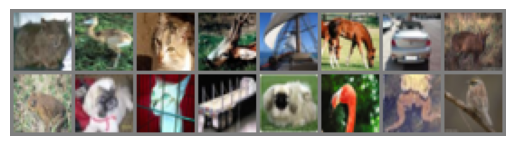

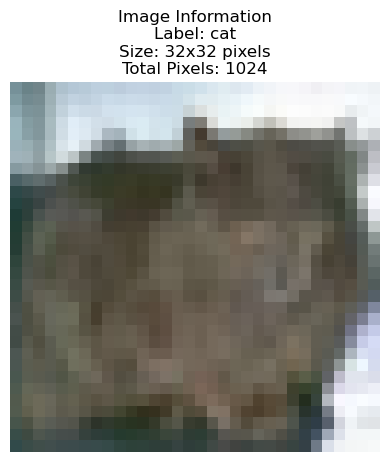

Epoch 1/20, Loss: 1.3620
Epoch 2/20, Loss: 0.9929
Epoch 3/20, Loss: 0.8407
Epoch 4/20, Loss: 0.7339
Epoch 5/20, Loss: 0.6414
Epoch 6/20, Loss: 0.5567
Epoch 7/20, Loss: 0.4813
Epoch 8/20, Loss: 0.4114
Epoch 9/20, Loss: 0.3423
Epoch 10/20, Loss: 0.2831
Epoch 11/20, Loss: 0.2353
Epoch 12/20, Loss: 0.1917
Epoch 13/20, Loss: 0.1605
Epoch 14/20, Loss: 0.1305
Epoch 15/20, Loss: 0.1154
Epoch 16/20, Loss: 0.0974
Epoch 17/20, Loss: 0.0874
Epoch 18/20, Loss: 0.0829
Epoch 19/20, Loss: 0.0779
Epoch 20/20, Loss: 0.0806
Accuracy on the test set: 69.42%

✅ **Overall Model Accuracy : 69.42%**
Training completed !


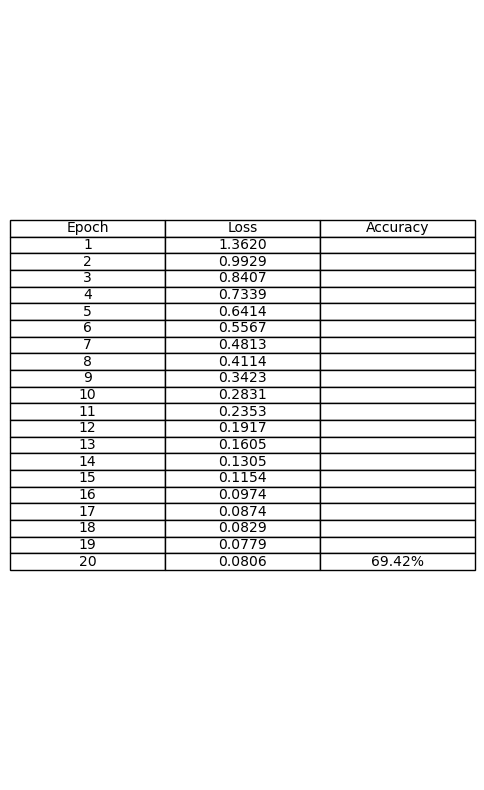

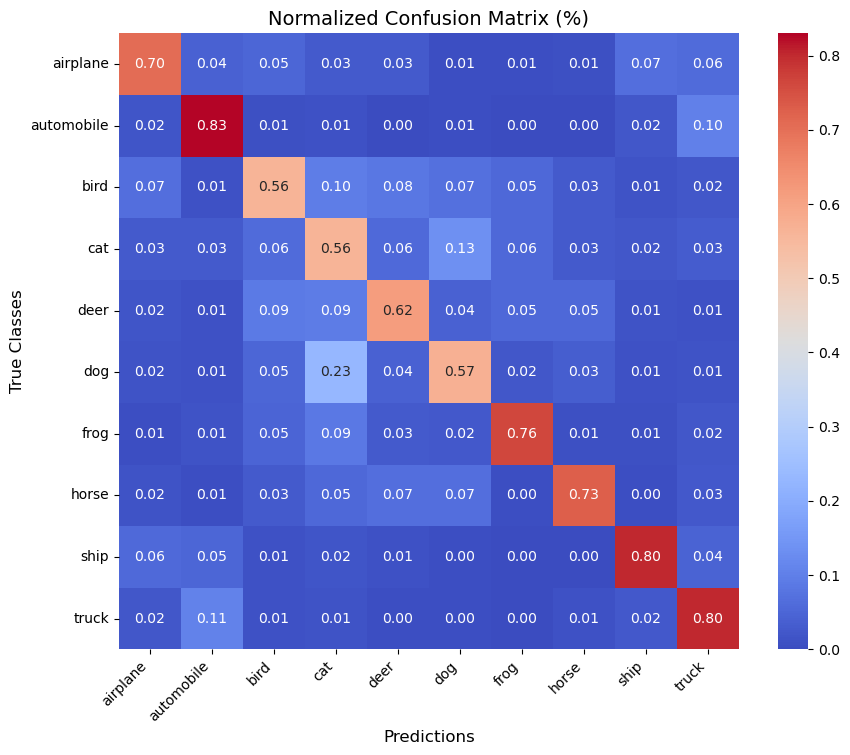

🎯 **Top-1 Accuracy:** 69.42%
🎯 **Top-5 Accuracy:** 97.03%


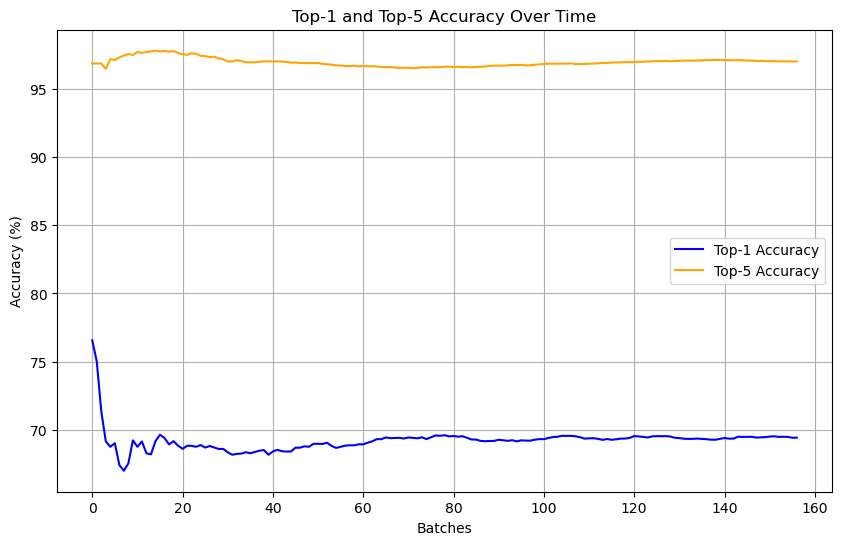

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


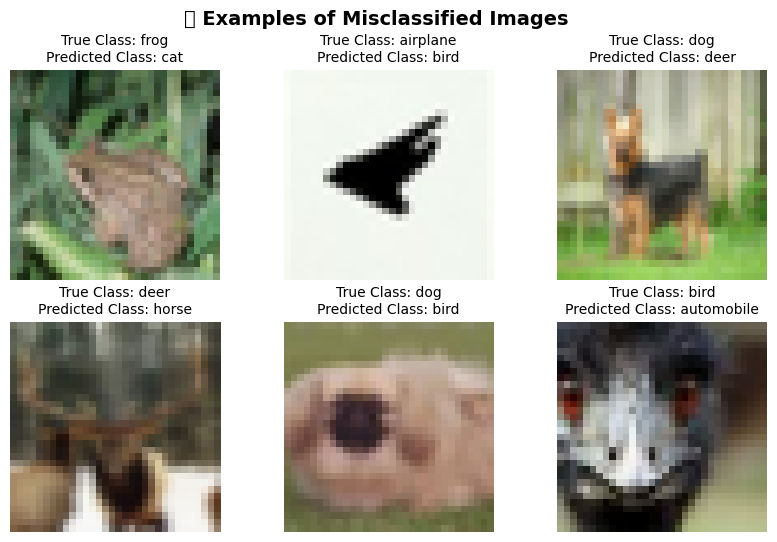


📊 **Performance Metrics per Class**
              precision    recall  f1-score   support

    airplane     0.7450    0.7040    0.7239      1000
  automobile     0.7518    0.8300    0.7890      1000
        bird     0.6140    0.5630    0.5874      1000
         cat     0.4714    0.5610    0.5123      1000
        deer     0.6574    0.6160    0.6360      1000
         dog     0.6175    0.5730    0.5944      1000
        frog     0.7937    0.7620    0.7776      1000
       horse     0.8089    0.7280    0.7663      1000
        ship     0.8142    0.8020    0.8081      1000
       truck     0.7081    0.8030    0.7526      1000

    accuracy                         0.6942     10000
   macro avg     0.6982    0.6942    0.6948     10000
weighted avg     0.6982    0.6942    0.6948     10000



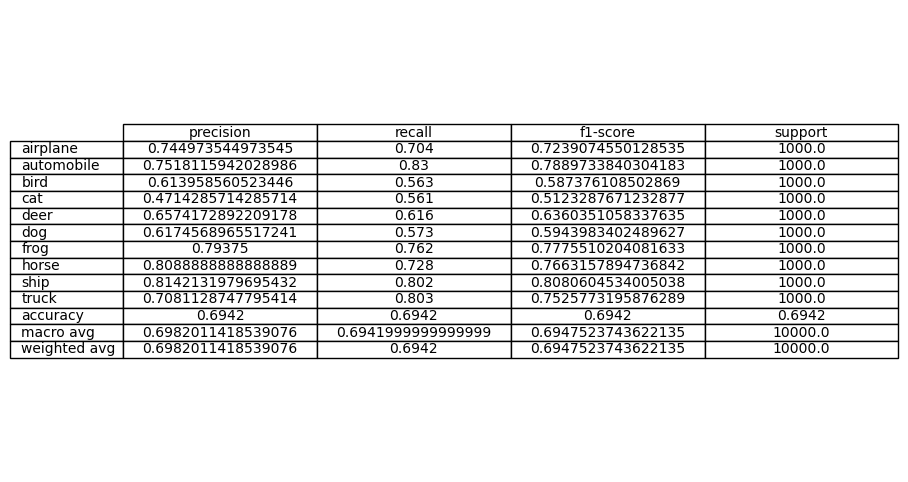

In [5]:
# 1. Define hyperparameters
batch_size = 64  # Number of images per batch during training
learning_rate = 0.001  # Step size for the optimizer
num_epochs = 20  # Number of times the entire dataset is passed through the model

# 2. Load and transform CIFAR-100
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors and normalize pixel values from [0,255] to [0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize each channel to have mean 0 and variance 1
])


# Load the training dataset with transformations
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)  # Shuffle the dataset for randomness

# Load the test dataset with transformations
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)  # No shuffling for testing

# Print dataset shapes (similar to your TensorFlow print statements)
print(f"Training set size: {len(trainset)} images")
print(f"Test set size: {len(testset)} images")

# 3. Function to unnormalize an image (convert back to original pixel values)
def unnormalize(img, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    img = img.clone().detach()  # Clone the image to avoid modifying the original tensor
    for i in range(3):  # Loop through each color channel (Red, Green, Blue)
        img[i] = img[i] * std[i] + mean[i]  # Reverse normalization transformation
    return img

# 4. Function to display a single image
def imshow(img):
    img = unnormalize(img)  # Unnormalize the image for correct visualization
    npimg = img.numpy()  # Convert PyTorch tensor to NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Rearrange dimensions to match image format (H, W, C)
    plt.axis("off")  # Remove axis labels for better visualization
    plt.show()

# 5. Function to display an image with additional information
def imshow_with_info(img, label, title="Image Information"):
    img = unnormalize(img)  # Unnormalize the image for correct visualization
    npimg = img.numpy()  # Convert PyTorch tensor to NumPy array
    npimg = np.transpose(npimg, (1, 2, 0))  # Rearrange dimensions for proper display with matplotlib
    
    # Extract image size and pixel count
    height, width, channels = npimg.shape
    num_pixels = height * width

    # Display the image with detailed information
    plt.imshow(npimg)
    plt.axis("off")  # Remove axis for a cleaner display
    plt.title(f"{title}\nLabel: {trainset.classes[label]}\nSize: {width}x{height} pixels\nTotal Pixels: {num_pixels}")
    plt.show()

# 6. Retrieve a batch of images from the dataset (avoids redundant calls)
dataiter = iter(trainloader)  # Create an iterator for the training data
images, labels = next(dataiter)  # Get the next batch of images and labels

# 7. Display multiple images in a grid format
img_grid = torchvision.utils.make_grid(images[:16])  # Take the first 16 images and arrange them in a grid
imshow(img_grid)  # Display the grid of images

# 8. Display a single image with detailed information
imshow_with_info(images[0], labels[0])  # Show the first image from the batch with details

# 9. Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Input dimensions: 32x32x3 (height * width * channels)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolution layer: 3 input channels (RGB), 32 output channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolution layer: 32 input channels, 64 output channels
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling reduces spatial dimensions by half
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # First fully connected layer: transforms feature maps into 128 features
        self.fc2 = nn.Linear(128, 10)  # Second fully connected layer: outputs 100 classes for CIFAR-100
        self.relu = nn.ReLU()  # Activation function
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Apply first convolution, activation function, and max pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply second convolution, activation function, and max pooling
        
        # Flatten the 2D feature maps into a 1D vector for the fully connected layers
        x = x.view(-1, 64 * 8 * 8)  # -1 allows PyTorch to automatically calculate the batch size
        x = self.relu(self.fc1(x))  # Apply first fully connected layer with activation
        x = self.fc2(x)  # Apply second fully connected layer (output layer)
        return x

# 10. Initialize the model, loss function, and optimizer
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  # Use MPS (Apple Metal) if available, otherwise CPU
model = CNN().to(device)  # Move the model to the selected device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer for adjusting weights
# --- 1. Variables de tracking ---
losses = []
# 11. Train the model
for epoch in range(num_epochs):    # Loop over epochs
    running_loss = 0.0    # Initialize running loss
    for images, labels in trainloader:    # Loop over mini-batches
        images, labels = images.to(device), labels.to(device)    # Move to GPU/CPU

        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)   # Forward pass (prediction)
        loss = criterion(outputs, labels)    # Compute loss
        loss.backward()     # Backpropagation (compute gradients)
        optimizer.step()  # Update model parameters
        
        running_loss += loss.item()    # Accumulate loss
    
    # Print loss for this epoch
    avg_loss = running_loss / len(trainloader)
    losses.append(avg_loss)  # Stocker la loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
correct = 0
total = 0

# Disable gradient calculations during evaluation to save memory and speed up computations
with torch.no_grad():  # No need to calculate gradients
    for images, labels in testloader:  # Iterate through the test dataset
        images, labels = images.to(device), labels.to(device)  # Move data to CPU/GPU
        outputs = model(images)    # Get model predictions
        _, predicted = torch.max(outputs, 1)   # Select the class with the highest probability
        total += labels.size(0)   # Count total number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

# Print overall test accuracy
print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Disable gradients during evaluation
with torch.no_grad():  # # Disable gradients during evaluation
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)   #Move data to device
        outputs = model(images)   # Get predictions
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability

        y_true.extend(labels.cpu().numpy())  # Store true labels
        y_pred.extend(predicted.cpu().numpy())  # Store predicted labels


# Compute overall accuracy
accuracy = accuracy_score(y_true, y_pred) * 100
print(f"\n✅ **Overall Model Accuracy : {accuracy:.2f}%**")

print("Training completed !")
# --- 4. Create a DataFrame for the table ---
epoch_nums = list(range(1, num_epochs + 1))
accuracy_list = [None]*(num_epochs-1) + [f"{accuracy:.2f}%"]  # Display only at the end

df = pd.DataFrame({
    'Epoch': epoch_nums,
    'Loss': [f"{l:.4f}" for l in losses],
    'Accuracy': accuracy_list
})

# --- 5. Display the table with matplotlib ---
fig, ax = plt.subplots(figsize=(6, 0.5 * num_epochs))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

plt.savefig('training_progress_table.png', bbox_inches='tight', dpi=300)
plt.show()
# 12. Test the model


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix to display percentages instead of raw counts
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=trainset.classes, yticklabels=trainset.classes)

plt.xlabel("Predictions", fontsize=12)   # Label for x-axis
plt.ylabel("True Classes", fontsize=12)  # Label for y-axis
plt.title("Normalized Confusion Matrix (%)", fontsize=14)   # Title of the heatmap
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()   # Display the confusion matrix plot


# Compute Top-1 and Top-5 Accuracy
correct_top1 = 0
correct_top5 = 0
total = 0

# Lists to store accuracy values for plotting
top1_accuracies = []
top5_accuracies = []

# Disable gradients during evaluation
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        outputs = model(images)  # Get model predictions
        
        # Get the top 5 predicted classes
        _, top5_preds = torch.topk(outputs, 5, dim=1)  
        
        # Check if the true label is the highest confidence prediction (Top-1)
        correct_top1 += (top5_preds[:, 0] == labels).sum().item()  

        # Check if the true label is among the top 5 predictions (Top-5)
        correct_top5 += (top5_preds == labels.view(-1, 1)).sum().item()
        
        total += labels.size(0)  # Count total number of samples

        # Compute Top-1 and Top-5 Accuracy for this batch
        top1_acc_batch = 100 * correct_top1 / total
        top5_acc_batch = 100 * correct_top5 / total
        
        # Store the accuracy for plotting
        top1_accuracies.append(top1_acc_batch)
        top5_accuracies.append(top5_acc_batch)

# Compute final Top-1 and Top-5 Accuracy
top1_acc = 100 * correct_top1 / total
top5_acc = 100 * correct_top5 / total

print(f"🎯 **Top-1 Accuracy:** {top1_acc:.2f}%")
print(f"🎯 **Top-5 Accuracy:** {top5_acc:.2f}%")

# Plot Top-1 and Top-5 accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(top1_accuracies, label="Top-1 Accuracy", color='blue')
plt.plot(top5_accuracies, label="Top-5 Accuracy", color='orange')
plt.title("Top-1 and Top-5 Accuracy Over Time")
plt.xlabel("Batches")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()


# Identify misclassified samples
wrong_indices = np.where(np.array(y_true) != np.array(y_pred))[0]

# Display 6 examples of misclassified images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  
fig.suptitle("🔍 Examples of Misclassified Images", fontsize=14, fontweight='bold')  # Add a title

for i, ax in enumerate(axes.flat): # Loop through the 6 image slots
    index = wrong_indices[i] # Get index of a misclassified sample
    image, true_label, pred_label = testset[index][0], y_true[index], y_pred[index]
    
     # Denormalize the image (assuming it was normalized during preprocessing)
    image = image.permute(1, 2, 0).numpy() * 0.5 + 0.5  

    ax.imshow(image)  # Display the image
    ax.set_title(f"True Class: {trainset.classes[true_label]}\nPredicted Class: {trainset.classes[pred_label]}", fontsize=10)
    ax.axis("off") # Remove axis ticks
plt.show()  # Show misclassified images

# Compute and display Precision, Recall, and F1-score
print("\n📊 **Performance Metrics per Class**")
print(classification_report(y_true, y_pred, target_names=trainset.classes, digits=4)) 
# Generate the report
report = classification_report(y_true, y_pred, target_names=trainset.classes, digits=4, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Display as table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Adding row names (classes) to the table
table = ax.table(
    cellText=report_df.values, 
    colLabels=report_df.columns, 
    rowLabels=report_df.index, 
    loc='center', 
    cellLoc='center'
)

# Save as image
plt.savefig('classification_report_table.png', bbox_inches='tight', dpi=300)
plt.show()


ADD SOME  IMPROVMENTS TO INCREASE THE ACCURACY OF THE MODEL

In [ ]:
model = CNN()  # Initialize the same model as defined previously
model.load_state_dict(torch.load("model_cifar10.pth"))  # Load the saved model weights
model.to(device)  # Move the model to the correct device (CPU or GPU)
model.eval()  # Set the model to evaluation mode (disables dropout and batch normalization updates)

# 1. Define hyperparameters
batch_size = 64  # Number of images processed at once
learning_rate = 0.001  # Initial learning rate
num_epochs = 20  # Total number of training epochs

# 2. Data Augmentation ➡️ Helps reduce overfitting and improves generalization
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flips images horizontally
    transforms.RandomRotation(10),  # Rotates images randomly up to ±10°
    transforms.ToTensor(),  # Converts images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes pixel values
])

#Without transform: images are PIL objects (raw images).
#With transform: images become normalized PyTorch tensors.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 3. Define CNN model with Batch Normalization and Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # 1st convolutional layer
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization for stability
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 2nd convolutional layer
        self.bn2 = nn.BatchNorm2d(64)  # Batch normalization
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling to reduce spatial dimensions
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 100)  # Output layer with 100 classes (CIFAR-100)
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(0.5)  # Dropout to prevent overfitting

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # Convolution + BN + ReLU + Pooling
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)  # Flatten feature maps into a vector
        x = self.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.dropout(x)  # Apply dropout during training
        x = self.fc2(x)  # Output layer
        return x

# 4. Initialize model, loss function, and optimizer
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  # Use Apple MPS if available
model = CNN().to(device)  # Move model to device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# 5. Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce LR by 10x every 5 epochs

# StepLR(optimizer, step_size=5, gamma=0.1) reduces the learning rate by 10× every 5 epochs.
# ➡️ Allows you to learn quickly at the beginning and reduce the learning rate when the model stabilizes.
# ➡️ Improves convergence by preventing the model from getting stuck in a suboptimal local minimum.

# 6. Training Loop
for epoch in range(num_epochs):
    running_loss = 0.0  # Track loss per epoch
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()
    
    scheduler.step()  # Update learning rate
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader):.4f}")

print("Training completed!")

    # At the end of each epoch, we update the learning rate by calling scheduler.step() to adapt it dynamically.
    # ➡️ Avoids learning too fast for too long, which can cause poor convergence.

# 7. Model Evaluation
correct = 0
total = 0
with torch.no_grad():  # Disable gradients for evaluation
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get highest probability class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total  # Compute accuracy
print(f"✅ Model Accuracy: {accuracy:.2f}%")

# 8. Compute Confusion Matrix
y_true = []  # List to store true labels
y_pred = []  # List to store predicted labels

with torch.no_grad():  # Disable gradient computation for evaluation (saves memory and speeds up computation)
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device (CPU/GPU)
        outputs = model(images)  # Forward pass: get model predictions
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability (Top-1 prediction)
        y_true.extend(labels.cpu().numpy())  # Store true labels ( NumPy does not support GPU tensors, so .cpu(): Moves the tensor to the CPU.)
        y_pred.extend(predicted.cpu().numpy())  # Store predicted labels

# Compute confusion matrix (raw counts)
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix to percentages (% of actual class samples)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="coolwarm",  
            xticklabels=trainset.classes, yticklabels=trainset.classes)  # Create heatmap with class labels
plt.xlabel("Predicted Labels")  # X-axis label
plt.ylabel("True Labels")  # Y-axis label
plt.title("Confusion Matrix (%)")  # Title
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()  # Display the confusion matrix

# 9. Compute Top-1 and Top-5 Accuracy
correct_top1 = 0  # Counter for Top-1 correct predictions
correct_top5 = 0  # Counter for Top-5 correct predictions
total = 0  # Total number of samples

with torch.no_grad():  # No gradients needed during evaluation
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
        outputs = model(images)  # Forward pass: get model predictions
        _, top5_preds = torch.topk(outputs, 5, dim=1)  # Get the top-5 predictions for each image
        
        # Check if the top-1 prediction (first in top-5) is correct
        correct_top1 += (top5_preds[:, 0] == labels).sum().item()
        
        # Check if the true label is present in the top-5 predictions
        correct_top5 += (top5_preds == labels.view(-1, 1)).sum().item()
        
        total += labels.size(0)  # Count total samples

# Compute and print Top-1 accuracy (percentage of correctly classified images)
top1_acc = 100 * correct_top1 / total
print(f"🎯 Top-1 Accuracy: {top1_acc:.2f}%")  # Top-1 accuracy = highest probability prediction is correct

# Compute and print Top-5 accuracy (percentage of images where the correct class is in the top 5 predictions)
top5_acc = 100 * correct_top5 / total
print(f"🎯 Top-5 Accuracy: {top5_acc:.2f}%")

# 10. Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=trainset.classes, digits=4))


# 🚀 Summary of Metrics
# ✅ Confusion Matrix ➝ See which classes are misclassified.
# ✅ Top-1 and Top-5 Accuracy ➝ Better understand overall performance.
# ✅ Misclassified Images ➝ Visually inspect the model’s errors.
# ✅ F1-score, Precision, and Recall ➝ Identify where the model struggles.

# 📌 Summary of Improvements
# ✅ Data augmentation ➝ Better generalization
# ✅ Batch Normalization ➝ More stable learning
# ✅ Dropout ➝ Less overfitting
# ✅ Scheduler ➝ Better learning rate management
# ✅ Added evaluation metrics ➝ Better performance analysis




Epoch 1/20, Loss: 1.6445


SAVE THE MODEL

In [6]:

# Save the model after training
torch.save(model.state_dict(), "model_cifar10.pth")
print("✅ All model weights have been successfully saved!")  # Confirmation message
# Load the saved model state dictionary
state_dict = torch.load("model_cifar10.pth")
print(state_dict.keys())  # Display all saved layers


✅ All model weights have been successfully saved!
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


TEST IT ON A REAL FROG IMAGE

In [ ]:
# 1. Load the trained model
model = CNN()  # Initialize the same model as defined previously
model.load_state_dict(torch.load("model_cifar10.pth"))  # Load the saved model weights
model.to(device)  # Move the model to the correct device (CPU or GPU)
model.eval()  # Set the model to evaluation mode (disables dropout and batch normalization updates)

# 2. Load a test image (example: an airplane image)
img_path = "frog.png"  # Replace with the actual image path
img = Image.open(img_path)  # Open the image using PIL

# 3. Apply the same transformations as used during training
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match CIFAR-10 input dimensions (32x32)
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor (normalizes pixel values to [0,1])
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to range [-1,1] (same as training)
])

img_tensor = transform(img).unsqueeze(0)  # Add a batch dimension (model expects batch format: [batch_size, channels, height, width])

# 4. Perform inference (make a prediction)
with torch.no_grad():  # Disable gradient computation (reduces memory usage and speeds up inference)
    img_tensor = img_tensor.to(device)  # Move the image tensor to the same device as the model (CPU or GPU)
    outputs = model(img_tensor)  # Forward pass: get predictions from the model
    _, predicted_class = torch.max(outputs, 1)  # Get the class index with the highest probability

# 5. Display the image and the predicted class
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 class labels
predicted_label = classes[predicted_class.item()]  # Convert the predicted index to a class name

plt.imshow(img)  # Display the image
plt.title(f"Predicted: {predicted_label}")  # Show predicted label as title
plt.axis("off")  # Hide axis for better visualization
plt.show()

# Print the predicted label
print(f"Predicted class: {predicted_label}")

TEST IT WITH A DEEP FOOL ATTACK 

In [ ]:

# Load your already defined CNN model (if already trained)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN().to(device)
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model.eval()

# Transformation to preprocess the image (as in CIFAR-10)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10 Standardization
])

# Load and preprocess the image (example with the image "frog.png")
img_path = "frog.png"  
image_pil = Image.open(img_path).convert("RGB")
image = transform(image_pil).unsqueeze(0).to(device)

# The actual label of the image (eg: "frog" corresponds to label 6 in CIFAR-10)
label = torch.tensor([6]).to(device)

#1. Prediction before the attack
with torch.no_grad():
    output = model(image)
    _, predicted_label_before = output.max(1)
    
# Display the predicted class before the attack
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_before = classes[predicted_label_before.item()]
print(f"Predicted class before attack: {predicted_before}")

# DeepFool attack function
def deepfool(model, image, label, max_iter=50, epsilon=1e-4):
    image = image.clone().detach().requires_grad_(True).to(device)
    original_class = label.item()

    # Set model to evaluation mode
    model.eval()

    # DeepFool attack
    perturbation = torch.zeros_like(image)
    for i in range(max_iter):
        output = model(image)
        loss = F.cross_entropy(output, label)
        model.zero_grad()
        loss.backward()

        # Calculate gradient and direction of the attack
        gradient = image.grad.data
        gradient = gradient / torch.norm(gradient)  # Normalize the gradient

        # Calculate the direction of perturbation
        perturbed_image = image + epsilon * gradient

        # Ensure the perturbation is within bounds [0, 1]
        perturbed_image = torch.clamp(perturbed_image, 0, 1)

        # Check if the prediction changes
        output = model(perturbed_image)
        predicted_class = output.argmax(dim=1).item()

        # If prediction changes, exit loop
        if predicted_class != original_class:
            break

        # Update image with perturbation
        image = perturbed_image.clone().detach().requires_grad_(True)

    return perturbed_image, i

#2. Apply the DeepFool attack
adversarial_image, num_iterations = deepfool(model, image, label)

#3. Prediction after the attack
with torch.no_grad():
    output_adv = model(adversarial_image)
    _, predicted_label_after = output_adv.max(1)

# Displaying the predicted class after the attack
predicted_after = classes[predicted_label_after.item()]
print(f"Predicted class after attack : {predicted_after}")
print(f"Number of iterations for the DeepFool attack : {num_iterations}")

#4. Display the original image and the opposing image
image_np = image.squeeze(0).permute(1, 2, 0).cpu().detach().numpy()
image_adv_np = adversarial_image.squeeze(0).permute(1, 2, 0).cpu().detach().numpy()

# Normalize images for display
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalization for display
image_adv_np = (image_adv_np - image_adv_np.min()) / (image_adv_np.max() - image_adv_np.min())

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image_np)
axes[0].set_title(f"original image : {predicted_before}")
axes[0].axis('off')

# Adversarial imagee
axes[1].imshow(image_adv_np)
axes[1].set_title(f"adversarial image : {predicted_after}")
axes[1].axis('off')



DISPLAY THE ITERATIONS

In [ ]:
# Load your already defined CNN model (if already trained)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN().to(device)
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model.eval()

# Transformation to preprocess the image (as in CIFAR-10)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10 Standardization
])

# Load and preprocess the image (example with the image "frog.png")
img_path = "frog.png"  
image_pil = Image.open(img_path).convert("RGB")
image = transform(image_pil).unsqueeze(0).to(device)

# The actual label of the image (eg: "frog" corresponds to label 6 in CIFAR-10)
label = torch.tensor([6]).to(device)

#1. Prediction before the attack
with torch.no_grad():
    output = model(image)
    _, predicted_label_before = output.max(1)
    
# Display the predicted class before the attack
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_before = classes[predicted_label_before.item()]
print(f"Predicted class before attack: {predicted_before}")

# DeepFool attack function
def deepfool(model, image, label, max_iter=50, epsilon=1e-4):
    image = image.clone().detach().requires_grad_(True).to(device)
    original_class = label.item()

    # Set model to evaluation mode
    model.eval()

    # DeepFool attack
    perturbation = torch.zeros_like(image)
    for i in range(max_iter):
        output = model(image)
        loss = F.cross_entropy(output, label)
        model.zero_grad()
        loss.backward()

        # Calculate gradient and direction of the attack
        gradient = image.grad.data
        gradient = gradient / torch.norm(gradient)  # Normalize the gradient

        # Calculate the direction of perturbation
        perturbed_image = image + epsilon * gradient

        # Ensure the perturbation is within bounds [0, 1]
        perturbed_image = torch.clamp(perturbed_image, 0, 1)

        # Check if the prediction changes
        output = model(perturbed_image)
        predicted_class = output.argmax(dim=1).item()

        # If prediction changes, exit loop
        if predicted_class != original_class:
            break

        # Update image with perturbation
        image = perturbed_image.clone().detach().requires_grad_(True)

    return perturbed_image, i

#2. Apply the DeepFool attack
adversarial_image, num_iterations = deepfool(model, image, label)

#3. Prediction after the attack
with torch.no_grad():
    output_adv = model(adversarial_image)
    _, predicted_label_after = output_adv.max(1)

# Displaying the predicted class after the attack
predicted_after = classes[predicted_label_after.item()]
print(f"Predicted class after attack : {predicted_after}")
print(f"Number of iterations for the DeepFool attack : {num_iterations}")

#4. Display the original image and the opposing image
image_np = image.squeeze(0).permute(1, 2, 0).cpu().detach().numpy()
image_adv_np = adversarial_image.squeeze(0).permute(1, 2, 0).cpu().detach().numpy()

# Normalize images for display
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalization for display
image_adv_np = (image_adv_np - image_adv_np.min()) / (image_adv_np.max() - image_adv_np.min())

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image_np)
axes[0].set_title(f"Original Image: {predicted_before}")
axes[0].axis('off')

# Adversarial image
axes[1].imshow(image_adv_np)
axes[1].set_title(f"Adversarial Image: {predicted_after}")
axes[1].axis('off')

# Add text on the image
fig.suptitle(f"Predicted Class Before Attack: {predicted_before}\nPredicted Class After Attack: {predicted_after}\nIterations: {num_iterations}", fontsize=12)

# Save image
plt.savefig("deepfool_attack_result.png")
plt.show()


TEST THE MODEL WITH AN ADVERSARIAL IMAGE(FGSM ATTACK)

In [ ]:


# ===== 2. Load & Preprocess the Original Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  # Original clean image
img = Image.open(img_path).convert("RGB")  # Open and convert to RGB
img_tensor = transform(img).unsqueeze(0).to(device).to(torch.float32)  # Add batch dimension

# ===== 3. Wrap Model with Foolbox =====
fmodel = fb.PyTorchModel(model, bounds=(-1, 1), device=device)

# ===== 4. Apply FGSM Attack & Save Adversarial Image =====
label = torch.tensor([6], device=device, dtype=torch.long)  # "Frog" class label
epsilons = [0.03]  # Attack strength

attack = fb.attacks.FGSM()  # Fast Gradient Sign Method attack
_, clipped_list, _ = attack(fmodel, img_tensor, label, epsilons=epsilons)
adv_tensor = clipped_list[0]  

# Convert adversarial image for saving
adv_img = adv_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
adv_img = (adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())  # Normalize to [0,1]
adv_img = (adv_img * 255).astype(np.uint8)  # Convert to uint8

adv_img_path = "frog_adversarial.png"
Image.fromarray(adv_img).save(adv_img_path)  # Save adversarial image
print(f"Adversarial image saved as {adv_img_path}")

# ===== 5. Load & Test the Adversarial Image =====
adv_img = Image.open(adv_img_path).convert("RGB")
adv_tensor = transform(adv_img).unsqueeze(0).to(device)

# Perform inference
with torch.no_grad():
    output = model(adv_tensor)
    _, predicted = output.max(1)

# Display adversarial image and prediction
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

plt.imshow(adv_img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicted class for adversarial image (FGSM attack): {predicted_label}")

ANOTHER TEST ON THE ORIGINAL MODEL WITH AN ADVERSARIAL EXAMPLE (FGSM ATTACK)

In [ ]:
# ===== 1. Load the trained model =====
model = CNN()  # Initialize the model (ensure it matches the saved model)
model.load_state_dict(torch.load("model_cifar10.pth"))  # Load weights
model.to(device)  # Move model to GPU/CPU
model.eval()  # Set to evaluation mode

# 1️⃣ Load & Preprocess Image
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  
image = Image.open(img_path).convert("RGB")  
image = transform(image).unsqueeze(0).to(device).to(torch.float32)  
label = torch.tensor([6], device=device, dtype=torch.long)  # True label "frog"

# 2️⃣ FGSM ATTACK
def fgsm_attack(model, image, label, epsilon=0.1):
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adversarial_image = torch.clamp(image + perturbation, 0, 1)
    return adversarial_image.detach()  # Ensure no gradients are attached

# 🛡️ 3. Adversarial Detection (Image Perturbation)
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

# 🔄 Generate **one** adversarial image
adv_img = fgsm_attack(model, image, label, epsilon=0.1)

# 🔍 Detect if it's adversarial
is_adversarial, perturbation = detect_adversarial(image, adv_img)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# 🎯 Test the adversarial image
with torch.no_grad():
    output = model(adv_img)
    _, predicted = output.max(1)

# Display adversarial image and prediction
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

# ✅ Fix: Detach the tensor before converting to NumPy
adv_img_np = adv_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
adv_img_np = (adv_img_np - adv_img_np.min()) / (adv_img_np.max() - adv_img_np.min())
adv_img_np = (adv_img_np * 255).astype(np.uint8)

plt.imshow(adv_img_np)
plt.title(f"Predicted after FGSM attack: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicted class for adversarial image: {predicted_label}")

BIM ATTACK

In [ ]:
# ===== 1. Load the trained model =====
model = CNN()  # Initialize the model
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))  # Load weights
model.to(device).to(torch.float32)
model.eval()

# ===== 2. Load & Preprocess Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"
image_pil = Image.open(img_path).convert("RGB")
image = transform(image_pil).unsqueeze(0).to(device).to(torch.float32)
label = torch.tensor([6], device=device, dtype=torch.long)

# ===== 3. BIM Attack Function =====
def bim_attack(model, image, label, epsilon=0.03, alpha=0.005, iters=10):
    adv_image = image.clone().detach()
    for i in range(iters):
        adv_image.requires_grad = True
        output = model(adv_image)
        loss = F.cross_entropy(output, label)
        model.zero_grad()
        loss.backward()
        perturbation = alpha * adv_image.grad.sign()
        adv_image = adv_image + perturbation
        eta = torch.clamp(adv_image - image, min=-epsilon, max=epsilon)
        adv_image = torch.clamp(image + eta, min=0, max=1).detach()
    return adv_image

# Generate adversarial image
adv_img = bim_attack(model, image, label)

# Detect if adversarial
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

is_adversarial, perturbation = detect_adversarial(image, adv_img)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# Predict the class
with torch.no_grad():
    output = model(adv_img)
    _, predicted = output.max(1)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

# Display the image
adv_img_np = adv_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
adv_img_np = (adv_img_np - adv_img_np.min()) / (adv_img_np.max() - adv_img_np.min())
adv_img_np = (adv_img_np * 255).astype(np.uint8)

plt.imshow(adv_img_np)
plt.title(f"Predicted after BIM attack: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicted class for adversarial image: {predicted_label}")


PGD ATTACK

In [ ]:
# ===== 1. Load the trained model =====
model = CNN()
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model.to(device).to(torch.float32)
model.eval()

# ===== 2. Load & Preprocess Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"
image_pil = Image.open(img_path).convert("RGB")
image = transform(image_pil).unsqueeze(0).to(device).to(torch.float32)
label = torch.tensor([6], device=device, dtype=torch.long)

# ===== 3. PGD Attack Function =====
def pgd_attack(model, image, label, epsilon=0.03, alpha=0.005, iters=20):
    adv_image = image.clone().detach() + torch.empty_like(image).uniform_(-epsilon, epsilon)
    adv_image = torch.clamp(adv_image, 0, 1)
    
    for i in range(iters):
        adv_image.requires_grad = True
        output = model(adv_image)
        loss = F.cross_entropy(output, label)
        model.zero_grad()
        loss.backward()
        perturbation = alpha * adv_image.grad.sign()
        adv_image = adv_image + perturbation
        eta = torch.clamp(adv_image - image, min=-epsilon, max=epsilon)
        adv_image = torch.clamp(image + eta, min=0, max=1).detach()
    return adv_image

# Generate adversarial image
adv_img = pgd_attack(model, image, label)

# Detect if adversarial
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

is_adversarial, perturbation = detect_adversarial(image, adv_img)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# Predict the class
with torch.no_grad():
    output = model(adv_img)
    _, predicted = output.max(1)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

# Display the image
adv_img_np = adv_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
adv_img_np = (adv_img_np - adv_img_np.min()) / (adv_img_np.max() - adv_img_np.min())
adv_img_np = (adv_img_np * 255).astype(np.uint8)

plt.imshow(adv_img_np)
plt.title(f"Predicted after PGD attack : {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicted class for adversarial image: {predicted_label}")


APPLYING FGSM ATTACK ON A SIMPLE IMAGE 

In [ ]:
# ===== 1. Load trained model =====
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN()
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model.to(device)
model.eval()

# ===== 2. Load & Preprocess Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  # Change this to your test image
img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0).to(device).float()  # Ensure correct data type

# ===== 3. Wrap Model with Foolbox =====
# Move Foolbox model to CPU to avoid MPS issues
fmodel = fb.PyTorchModel(model, bounds=(-1, 1), device="cpu")  

# Move input image and label to CPU
img_tensor = img_tensor.to("cpu")  
label = torch.tensor([6], dtype=torch.long).to("cpu")  # Class index 6 = Frog

# ===== 4. Apply FGSM Attack =====
attack = fb.attacks.FGSM()
raw, clipped, is_adv = attack(fmodel, img_tensor, label, epsilons=0.03)  # Explicit keyword argument

# Convert to NumPy for visualization
adv_img = clipped.squeeze(0).permute(1, 2, 0).cpu().numpy()
adv_img = (adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())  # Normalize to [0,1]

# Show original and adversarial images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(adv_img)
plt.title("Adversarial Image (FGSM)")
plt.axis("off")

plt.show()

# Print attack success
print(f"Attack Successful? {is_adv.item()}")

APPLYING FGSM ATTACK, BIM ATTACK AND PGD ATTACK TO A SIMPLE IMAGE 

In [ ]:
# ===== 1. Load trained model =====
# Determine if we can use MPS (Metal Performance Shaders) for macOS devices or fall back to CPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Initialize the CNN model, replace 'CNN()' with your actual CNN class
model = CNN()  # Replace with your CNN model

# Load the model's trained parameters from a saved file
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))  # Load directly on the chosen device (MPS or CPU)

# Move the model to the target device (MPS or CPU) and cast the model's data type to float32 (MPS needs this)
model = model.to(device).to(torch.float32)

# Set the model to evaluation mode (important for layers like dropout or batchnorm that behave differently during training)
model.eval()

# ===== 2. Load & Preprocess Image =====
# Define a transformation pipeline to preprocess the image before feeding it into the model
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to 32x32 (matching CIFAR-10 input size)
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image (scaling the pixel values to the range [-1, 1])
])

# Open the image (make sure it's in RGB format)
img_path = "frog.png"
img = Image.open(img_path).convert("RGB")  # Convert to RGB mode (to ensure 3 channels)

# Apply the transformation pipeline to the image and add an extra dimension to make it batch-like
img_tensor = transform(img).unsqueeze(0).to(device).to(torch.float32)  # Add batch dimension and move to the correct device (MPS/CPU)

# Check the image tensor's value range to ensure it’s correctly normalized to [-1, 1]
print(f"Image tensor range: {img_tensor.min().item()} to {img_tensor.max().item()}")

# ===== 3. Wrap Model with Foolbox =====
# Wrap the model with Foolbox's PyTorchModel to allow adversarial attacks
# Define the bounds to ensure Foolbox knows the range of valid pixel values (-1 to 1)
fmodel = fb.PyTorchModel(model, bounds=(-1, 1), device=device)

# ===== 4. Apply Adversarial Attacks =====
# Create a dictionary of attack types to test against the model
attacks = {
    "FGSM": fb.attacks.FGSM(),  # Fast Gradient Sign Method (FGSM)
    "BIM": fb.attacks.LinfBasicIterativeAttack(),  # Basic Iterative Method (BIM)
    "PGD": fb.attacks.LinfPGD()  # Projected Gradient Descent (PGD)
}

# Create a tensor representing the true class label (class "6" for the frog class in CIFAR-10)
label = torch.tensor([6], device=device, dtype=torch.long)  # Convert the label to tensor (with the correct device and dtype)

# Define the epsilon values for the attacks (magnitude of perturbation allowed during attacks)
epsilons = [0.03]  # List of epsilon values (you can modify this for other attack variations)

# Plot results in a grid (1 row and len(attacks)+1 columns)
fig, axes = plt.subplots(1, len(attacks) + 1, figsize=(15, 5))

# Display the original image in the first column of the plot
axes[0].imshow(img)
axes[0].set_title("Original Image")  # Add title
axes[0].axis("off")  # Turn off axis labels

# Loop through each attack in the dictionary
for i, (name, attack) in enumerate(attacks.items()):
    # Apply the adversarial attack to the image
    _, clipped_list, is_adv = attack(fmodel, img_tensor, label, epsilons=epsilons)

    # Extract the first adversarial example from the list (in case there are multiple images for each epsilon)
    clipped = clipped_list[0]  

    # Ensure that the adversarial image is within the valid pixel range [-1, 1]
    assert clipped.min().item() >= -1 and clipped.max().item() <= 1, f"{name} attack out of bounds!"

    # Convert the adversarial tensor to a numpy array and normalize it to [0, 1] for visualization
    adv_img = clipped.squeeze(0).permute(1, 2, 0).cpu().numpy()  # Remove batch dimension, change dimensions for display, and move to CPU
    adv_img = (adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())  # Normalize to [0, 1]

    # Display the adversarial image in the corresponding subplot
    axes[i+1].imshow(adv_img)
    axes[i+1].set_title(f"{name} Attack")  # Add title
    axes[i+1].axis("off")  # Turn off axis labels

# Show the entire plot with original and adversarial images
plt.show()

# ===== Print Attack Success =====
# Check if the attack was successful by looking at the is_adv flag (True if the model misclassified)
for name, attack in attacks.items():
    _, _, is_adv = attack(fmodel, img_tensor, label, epsilons=epsilons)
    # Print whether the attack was successful or not (1 means successful, 0 means failed)
    print(f"{name} Attack Successful? {is_adv[0].item()}")  # Access the first (and only) element of is_adv


APPLYING THE ATTACKS ON ALL THE TRAIN_LOADER

In [ ]:
# ===== 1. Load trained model =====
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN()
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model = model.to(device).to(torch.float32)
model.eval()

# ===== 2. Load CIFAR-10 Dataset =====
batch_size = 32  # Define batch size
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Create folders for saving adversarial images
attack_folders = {"FGSM": "FGSM_adversarial_samples", "BIM": "BIM_adversarial_samples", "PGD": "PGD_adversarial_samples"}
for folder in attack_folders.values():
    os.makedirs(folder, exist_ok=True)

# ===== 3. Wrap Model with Foolbox =====
fmodel = fb.PyTorchModel(model, bounds=(-1, 1), device=device)

# ===== 4. Apply Adversarial Attacks =====
attacks = {
    "FGSM": fb.attacks.FGSM(),
    "BIM": fb.attacks.LinfBasicIterativeAttack(),
    "PGD": fb.attacks.LinfPGD()
}
epsilons = [0.03]

# Generate adversarial examples for a batch from trainloader
for batch_idx, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)
    for name, attack in attacks.items():
        _, clipped_list, is_adv = attack(fmodel, images, labels, epsilons=epsilons)
        clipped = clipped_list[0]
        
        for i in range(len(images)):
            adv_img = clipped[i].squeeze(0).permute(1, 2, 0).cpu().numpy()
            adv_img = (adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())  # Normalize to [0,1]
            adv_img = (adv_img * 255).astype(np.uint8)  # Convert to uint8
            
            img_path = os.path.join(attack_folders[name], f"{batch_idx}_{i}.png")
            Image.fromarray(adv_img).save(img_path)
    
    if batch_idx == 5:  # Limit to 5 batches to avoid generating too many images
        break

print("Adversarial images saved successfully!")


ADVERSARIAL TRAINING ON THE COOMBINED DATASET(ORIGINAL+ADVERSARIAL)

In [ ]:
# ===== 3. Load Adversarial Images and Combine with CIFAR-10 =====
attack_folders = {  # Paths to saved adversarial images
    "FGSM": "FGSM_adversarial_samples",
    "BIM": "BIM_adversarial_samples",
    "PGD": "PGD_adversarial_samples"
}

# Create folders if they don't exist
for folder in attack_folders.values():
    os.makedirs(folder, exist_ok=True)

# Custom dataset to load CIFAR-10 and adversarial images
class AdversarialCIFAR10(Dataset):
    def __init__(self, clean_dataset, adv_folders, transform=None):
        self.clean_dataset = clean_dataset  # Original CIFAR-10 dataset
        self.adv_folders = adv_folders  # Adversarial image folders
        self.transform = transform  # Transformations
        self.adv_images = []  # Store adversarial image paths
        self.adv_labels = []  # Store corresponding labels

        # Load adversarial images from each attack folder
        for attack, folder in adv_folders.items():
            for filename in os.listdir(folder):
                if filename.endswith(".png"):  # Only process PNG files
                    label = int(filename.split("_")[1].split(".")[0])  # Extract label from filename
                    img_path = os.path.join(folder, filename)
                    self.adv_images.append(img_path)
                    self.adv_labels.append(label)

    def __len__(self):
        return len(self.clean_dataset) + len(self.adv_images)  # Total size of dataset

    def __getitem__(self, idx):
        if idx < len(self.clean_dataset):
            # Load clean image from CIFAR-10
            img, label = self.clean_dataset[idx]
        else:
            # Load adversarial image
            img_path = self.adv_images[idx - len(self.clean_dataset)]
            label = self.adv_labels[idx - len(self.clean_dataset)]
            img = Image.open(img_path).convert("RGB")  # Convert image to RGB
            if self.transform:
                img = self.transform(img)  # Apply transformations

        return img, label

# Create dataset combining clean and adversarial images
combined_dataset = AdversarialCIFAR10(trainset, attack_folders, transform=transform)

# Create DataLoader to iterate over dataset
trainloader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)

# ===== 4. Adversarial Training Function =====
def adversarial_training(model, train_loader, optimizer, criterion, epsilon=0.03):
    model.train()  # Set model to training mode
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True  # Enable gradient calculation

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Compute gradients
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data

        # Generate adversarial examples using FGSM
        perturbed_data = data + epsilon * data_grad.sign()
        perturbed_data = torch.clamp(perturbed_data, 0, 1)  # Keep values in range

        # Train model on adversarial examples
        optimizer.zero_grad()
        output_adv = model(perturbed_data)
        loss_adv = criterion(output_adv, target)
        loss_adv.backward()
        optimizer.step()

# ===== 5. Train the Model with Adversarial Training =====
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define optimizer
criterion = nn.CrossEntropyLoss()  # Define loss function

# Perform adversarial training
adversarial_training(model, trainloader, optimizer, criterion)

# Save the trained model
torch.save(model.state_dict(), "adversarially_trained_model.pth")
print("Adversarial training completed and model saved!")


TEST THE NEW MODEL AFTER THE ADVERSARIAL TRAINING (WITH A NORMAL IMAGE)

In [ ]:
# ===== 5. Load the Model and Test on 'frog.jnp' =====
model.load_state_dict(torch.load("adversarially_trained_model.pth", map_location=device))
model.eval()

# Load and preprocess the test image
frog_image = Image.open("frog.png").convert("RGB")  # Open image
frog_tensor = transform(frog_image).unsqueeze(0).to(device)  # Apply transformations and add batch dimension

# Get model prediction
with torch.no_grad():
    output = model(frog_tensor)
    _, predicted = output.max(1)  # Get predicted label
    print(f"Predicted label for 'frog.png': {predicted.item()}")

TESTING THE NEW MODEL ON AN ADVERSARIAL IMAGE 

In [ ]:
# ===== 1. Load the Pretrained Model =====
model = CNN()  # Initialize the model (ensure it matches the saved model)
model.load_state_dict(torch.load("adversarially_trained_model.pth", map_location=device))  # Load weights
model.eval()  # Set to evaluation mode
model.to(device)  # Move model to GPU/CPU

# ===== 2. Load & Preprocess Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  
img = Image.open(img_path).convert("RGB")  
img_tensor = transform(img).unsqueeze(0).to(device).to(torch.float32)  

# ===== 3. Wrap Model with Foolbox =====
fmodel = fb.PyTorchModel(model, bounds=(-1, 1), device=device)

# ===== 4. Apply Adversarial Attacks & Save One Image =====
attacks = {
    "FGSM": fb.attacks.FGSM(),
    "BIM": fb.attacks.LinfBasicIterativeAttack(),
    "PGD": fb.attacks.LinfPGD()
}

label = torch.tensor([6], device=device, dtype=torch.long)
epsilons = [0.03]  

# Choose an attack and save one adversarial image
chosen_attack = "PGD"  # Change to "BIM" or "PGD" if needed
_, clipped_list, is_adv = attacks[chosen_attack](fmodel, img_tensor, label, epsilons=epsilons)
adv_tensor = clipped_list[0]  

# Convert adversarial image to a savable format
adv_img = adv_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
adv_img = (adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())  
adv_img = (adv_img * 255).astype(np.uint8)

adv_img_path = f"{chosen_attack}_adversarial.png"
Image.fromarray(adv_img).save(adv_img_path)  # Save the adversarial image
print(f"Adversarial image saved as {adv_img_path}")

# ===== 5. Detect Adversarial Before Testing =====
def detect_adversarial(original_img_tensor, adv_img_tensor, model):
    # Get predictions for the original and adversarial images
    with torch.no_grad():
        original_output = model(original_img_tensor)
        _, original_pred = original_output.max(1)

        adv_output = model(adv_img_tensor)
        _, adv_pred = adv_output.max(1)

    # Compare the predicted labels of the clean and adversarial images
    if original_pred != adv_pred:
        print("Alert: The image is adversarial!")
    else:
        print("The image is not adversarial.")

# Reload the saved adversarial image
adv_img = Image.open(adv_img_path).convert("RGB")
adv_tensor = transform(adv_img).unsqueeze(0).to(device)

# Detect adversarial before prediction
detect_adversarial(img_tensor, adv_tensor, model)

# ===== 6. Test the Adversarial Image =====
# Pass the adversarial image through the model for final prediction
with torch.no_grad():
    output = model(adv_tensor)
    _, predicted = output.max(1)

print(f"Predicted label for adversarial image ({chosen_attack} attack): {predicted.item()}")

COMPARISON BETWEEN THE NEW MODEL AFTER THE ADVERSARIAL TRAINING AND THE ORIGINAL ONE 

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# ===== 1. Load the trained model =====
print("1st prediction with the original model")
model = CNN()  # Initialize the model (ensure it matches the saved model)
model.load_state_dict(torch.load("model_cifar10.pth"))  # Load weights
model.to(device)  # Move model to GPU/CPU
model.eval()  # Set to evaluation mode

# 1️⃣ Load & Preprocess Image
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  
image = Image.open(img_path).convert("RGB")  
image = transform(image).unsqueeze(0).to(device).to(torch.float32)  
label = torch.tensor([6], device=device, dtype=torch.long)  # True label "frog"

# 2️⃣ FGSM ATTACK
def fgsm_attack(model, image, label, epsilon=0.1):
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adversarial_image = torch.clamp(image + perturbation, 0, 1)
    return adversarial_image.detach()  # Ensure no gradients are attached

# 🛡️ 3. Adversarial Detection (Image Perturbation)
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

# 🔄 Generate **one** adversarial image
adv_img = fgsm_attack(model, image, label, epsilon=0.1)

# 🔍 Detect if it's adversarial
is_adversarial, perturbation = detect_adversarial(image, adv_img)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# 🎯 Test the adversarial image
with torch.no_grad():
    output = model(adv_img)
    _, predicted = output.max(1)

# Display adversarial image and prediction
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

# ✅ Fix: Detach the tensor before converting to NumPy
adv_img_orig_np = adv_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
adv_img_orig_np = (adv_img_orig_np - adv_img_orig_np.min()) / (adv_img_orig_np.max() - adv_img_orig_np.min())  # Normalize
adv_img_orig_np= (adv_img_orig_np * 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(adv_img_orig_np)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicted class for adversarial image: {predicted_label}")

predicted_label_orig = predicted_label  # Save original model's prediction


# 1️⃣ Load the Pretrained Model
print("2nd prediction with the new model")
model = CNN()  # Initialize the model (ensure it matches the saved model)
model.load_state_dict(torch.load("adversarially_trained_model.pth", map_location=device))  # Load weights
model.eval()  # Set to evaluation mode
model.to(device)  # Move model to GPU/CPU

# 2️⃣ Load & Preprocess Image
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  
image = Image.open(img_path).convert("RGB")  
image = transform(image).unsqueeze(0).to(device).to(torch.float32)  
label = torch.tensor([6], device=device, dtype=torch.long)  # True label "frog"

# 3️⃣ FGSM ATTACK
def fgsm_attack(model, image, label, epsilon=0.1):
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adversarial_image = torch.clamp(image + perturbation, 0, 1)
    return adversarial_image.detach()  # Ensure no gradients are attached

# 🛡️ 4. Adversarial Detection (Image Perturbation)
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

# 🔄 Generate **one** adversarial image
adv_img = fgsm_attack(model, image, label, epsilon=0.1)

# 🔍 Detect if it's adversarial
is_adversarial, perturbation = detect_adversarial(image, adv_img)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# 🎯 Test the adversarial image
with torch.no_grad():
    output = model(adv_img)
    _, predicted = output.max(1)

# Display adversarial image and prediction
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

# ✅ Fix: Detach the tensor before converting to NumPy
adv_img_np = adv_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
adv_img_np = (adv_img_np - adv_img_np.min()) / (adv_img_np.max() - adv_img_np.min())  # Normalize
adv_img_np = (adv_img_np * 255).astype(np.uint8)

# Plot the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adv_img_np)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

# Print the predicted label
print(f"Predicted class for adversarial image: {predicted_label}")
predicted_label_adv = predicted_label  # Save robust model's prediction

# Set font (try different ones if emojis don’t render)
plt.rcParams['font.family'] = 'DejaVu Sans'  # Try 'Arial Unicode MS' or 'Segoe UI Emoji'

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
fig.suptitle("ANALYSIS BETWEEN THE TWO MODELS", fontsize=20, fontweight="bold", ha="center")

axes[0].imshow(adv_img_orig_np)
axes[0].set_title(f"Original Model Prediction: {predicted_label_orig}")
axes[0].axis("off")
axes[0].text(0, -5, "Original model is sensitive to adversarial attacks!", fontsize=10, color='red')

axes[1].imshow(adv_img_np)
axes[1].set_title(f"Robust Model Prediction: {predicted_label_adv}")
axes[1].axis("off")
axes[1].text(0, -5, "Robust model correctly classifies despite attack!", fontsize=10, color='green')

plt.tight_layout()
plt.show()



TESTING ANOTHER DEFENSES

GRADIENT MASKING

In [ ]:
# ===== 1. Load the Adversarially Trained Model =====
model = CNN()  # Ensure CNN() matches the saved model's architecture
model.load_state_dict(torch.load("adversarially_trained_model.pth", map_location=device))
model.to(device)
model.eval()  # Set to evaluation mode

# ===== 2. Define the Gradient Masking Model =====
class GradientMaskedModel(torch.nn.Module):
    def __init__(self, model):
        super(GradientMaskedModel, self).__init__()
        self.model = model

    def forward(self, x):
        self.model.eval()  # Ensure the base model is in eval mode
        noise = torch.randn_like(x) * 0.1  # Add Gaussian noise to mask gradients
        x = x + noise
        return self.model(x)

# Apply gradient masking
masked_model = GradientMaskedModel(model).to(device)
masked_model.eval()  # Ensure it's in evaluation mode

# Save the updated model (only save the original model's weights)
torch.save(model.state_dict(), "adversarially_trained_model_with_masking.pth")
print("✅ Model with gradient masking saved successfully!")

# ===== 3. Wrap with Foolbox for Robustness Testing =====
fmodel = fb.PyTorchModel(masked_model, bounds=(-1, 1), device=device)

# ===== 4. Load & Preprocess Image =====
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"  
image = Image.open(img_path).convert("RGB")  
image = transform(image).unsqueeze(0).to(device).to(torch.float32)  
label = torch.tensor([6], device=device, dtype=torch.long)  # True label "frog"

# ===== 5. FGSM Attack (Using Foolbox) =====
epsilon = 0.1  # Perturbation strength
attack = fb.attacks.FGSM()
adv_image, _, success = attack(fmodel, image, label, epsilons=epsilon)

# Convert Foolbox tensor back to PyTorch tensor
adv_image = adv_image[0].detach()

# ===== 6. Detect if it's Adversarial =====
def detect_adversarial(image, adversarial_image, threshold=0.05):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

is_adversarial, perturbation = detect_adversarial(image, adv_image)
if is_adversarial:
    print(f'🚨 Alert: Adversarial image detected (perturbation = {perturbation:.4f})')
else:
    print(f'✅ No attack detected (perturbation = {perturbation:.4f})')

# ===== 7. Test the Adversarial Image =====
with torch.no_grad():
    output = masked_model(adv_image)
    _, predicted = output.max(1)

# Class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = classes[predicted.item()]

print(f"Predicted class for adversarial image: {predicted_label}")

FEATURE SQUEEZING

In [ ]:
def feature_squeezing(image, bit_depth=5):
    image = image * (2 ** bit_depth)
    image = image.round()
    image = image / (2 ** bit_depth)
    return image

# Apply Feature Squeezing
img_squeezed = feature_squeezing(img_tensor)


import matplotlib.pyplot as plt
import torch

# Helper function to convert tensor to image for display
def tensor_to_img(tensor):
    img = tensor.squeeze().permute(1, 2, 0).detach().cpu().numpy()
    img = (img * 0.5) + 0.5  # Unnormalize assuming (-1, 1)
    img = img.clip(0, 1)
    return img

# Run model prediction
model.eval()
with torch.no_grad():
    output_original = model(img_tensor)
    pred_original = output_original.argmax(dim=1).item()

    output_squeezed = model(img_squeezed)
    pred_squeezed = output_squeezed.argmax(dim=1).item()

# CIFAR-10 class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert images to NumPy
img_original_np = tensor_to_img(img_tensor)
img_squeezed_np = tensor_to_img(img_squeezed)

# Plot with predicted class in title
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_original_np)
plt.title(f"Original Image\nPrediction: {classes[pred_original]}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_squeezed_np)
plt.title(f"Feature Squeezed Image\nPrediction: {classes[pred_squeezed]}")
plt.axis("off")

plt.tight_layout()
plt.show()





In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# === 1. Feature Squeezing Function ===
def feature_squeezing(image, bit_depth=5):
    image = image * (2 ** bit_depth)
    image = image.round()
    image = image / (2 ** bit_depth)
    return image

# === 2. Load Image & Transform ===
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img_path = "frog.png"
image = Image.open(img_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(torch.float32)

# === 3. FGSM Attack Function ===
def fgsm_attack(model, image, label, epsilon=0.1):
    image = image.clone().detach().to(device)
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adv_image = torch.clamp(image + perturbation, 0, 1)
    return adv_image.detach()

# === 4. Load Model ===
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN()
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model = model.to(device).eval()

# === 5. Inference: Original & Squeezed ===
label = torch.tensor([6], device=device)  # frog
img_tensor = img_tensor.to(device)
img_squeezed = feature_squeezing(img_tensor)

with torch.no_grad():
    output_orig = model(img_tensor)
    output_squeezed = model(img_squeezed)
    pred_orig = output_orig.argmax(dim=1).item()
    pred_squeezed = output_squeezed.argmax(dim=1).item()

# === 6. Generate Adversarial Example ===
adv_image = fgsm_attack(model, img_tensor, label, epsilon=0.1)
with torch.no_grad():
    output_adv = model(adv_image)
    pred_adv = output_adv.argmax(dim=1).item()

# === 7. Perturbation between Original & Squeezed ===
perturbation = torch.mean(torch.abs(img_tensor - img_squeezed)).item()

# === 8. Visualization ===
def show_image(tensor, title, subplot):
    img = tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    plt.subplot(1, 3, subplot)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 4))
show_image(img_tensor, f"Original\nPrediction: {classes[pred_orig]}", 1)
show_image(adv_image, f"Adversarial\nPrediction: {classes[pred_adv]}", 2)
show_image(img_squeezed, f"Squeezed\nPrediction: {classes[pred_squeezed]}\nΔ: {perturbation:.4f}", 3)

plt.suptitle("🛡️ Feature Squeezing vs Adversarial Attack")
plt.tight_layout()
plt.show()


JPEG Compression Defense

In [ ]:
def jpeg_compression_defense(img_tensor, quality=75):
    img = transforms.ToPILImage()(img_tensor.squeeze(0))  
    img.save("compressed_image.jpg", quality=quality)  
    img_tensor_compressed = transforms.ToTensor()(Image.open("compressed_image.jpg"))
    return img_tensor_compressed.unsqueeze(0)  # Ensure batch format

img_compressed = jpeg_compression_defense(img_tensor)


Total Variation Denoising

In [ ]:
# === 1. Total Variation Denoising ===
def total_variation_denoising(image, weight=0.1, iterations=50):
    image = image.clone().detach().requires_grad_(True)
    optimizer = torch.optim.SGD([image], lr=weight)

    for _ in range(iterations):
        optimizer.zero_grad()
        grad_x = image[:, :, 1:, :] - image[:, :, :-1, :]
        grad_y = image[:, :, :, 1:] - image[:, :, :, :-1]
        loss = torch.sum(torch.abs(grad_x)) + torch.sum(torch.abs(grad_y))
        loss.backward()
        optimizer.step()

    return image.detach()

# === 2. FGSM Attack ===
def fgsm_attack(model, image, label, epsilon=0.1):
    image = image.clone().detach().to(device).requires_grad_(True)
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adv_image = torch.clamp(image + perturbation, 0, 1)
    return adv_image.detach()

# === 3. Image Preprocessing ===
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# === 4. Load Image ===
img_path = "frog.png"
image = Image.open(img_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(torch.float32)

# === 5. Load Model ===
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = CNN()
model.load_state_dict(torch.load("model_cifar10.pth", map_location=device))
model = model.to(device).eval()

# === 6. Set True Label (ex: frog = 6) ===
label = torch.tensor([6], device=device)

# === 7. Generate Adversarial Image ===
adv_image = fgsm_attack(model, img_tensor.to(device), label)

# === 8. Apply TVD on Adversarial Image ===
img_tvd = total_variation_denoising(adv_image)

# === 9. Get Predictions ===
with torch.no_grad():
    pred_orig = model(img_tensor.to(device)).argmax(dim=1).item()
    pred_adv = model(adv_image.to(device)).argmax(dim=1).item()
    pred_tvd = model(img_tvd.to(device)).argmax(dim=1).item()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# === 10. Visualization Function ===
def show_image(tensor, title, subplot):
    img = tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())  # Rescale to [0,1]
    plt.subplot(1, 3, subplot)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

# === 11. Show Results ===
plt.figure(figsize=(12, 4))
show_image(img_tensor, f"Original\nPrediction: {classes[pred_orig]}", 1)
show_image(adv_image, f"Adversarial\nPrediction: {classes[pred_adv]}", 2)
show_image(img_tvd, f"TVD Applied\nPrediction: {classes[pred_tvd]}", 3)
plt.suptitle("Adversarial Defense using Total Variation Denoising")
plt.tight_layout()
plt.show()


Randomized Smoothing

In [ ]:
def randomized_smoothing(image, noise_std=0.1):
    noise = torch.randn_like(image) * noise_std
    return torch.clamp(image + noise, 0.0, 1.0)

img_smoothed = randomized_smoothing(img_tensor)


Clipping & Saturation

In [ ]:
def clip_and_saturate(image, min_value=0.0, max_value=1.0):
    return torch.clamp(image, min_value, max_value)

img_clipped = clip_and_saturate(img_tensor)


COMBINATION OF ALL THE DEFENSES

In [ ]:
def apply_all_defenses(img_tensor):
    # Ensure input is in (batch, channels, height, width) format
    if img_tensor.dim() == 3:
        img_tensor = img_tensor.unsqueeze(0)

    # Move input to the correct device
    device = img_tensor.device

    # Apply defenses and move them to the same device
    img_squeezed = feature_squeezing(img_tensor).to(device)
    img_compressed = jpeg_compression_defense(img_tensor).to(device)
    img_tvd = total_variation_denoising(img_tensor).to(device)
    img_smoothed = randomized_smoothing(img_tensor).to(device)
    img_clipped = clip_and_saturate(img_tensor).to(device)

    # Verify shapes before combining
    assert img_squeezed.shape == img_compressed.shape == img_tvd.shape == img_smoothed.shape == img_clipped.shape, \
        f"Shape mismatch: {img_squeezed.shape}, {img_compressed.shape}, {img_tvd.shape}, {img_smoothed.shape}, {img_clipped.shape}"

    # Ensure all tensors are on the same device
    img_squeezed = img_squeezed.to(device)
    img_compressed = img_compressed.to(device)
    img_tvd = img_tvd.to(device)
    img_smoothed = img_smoothed.to(device)
    img_clipped = img_clipped.to(device)

    # Combine using element-wise averaging
    img_defended = (img_squeezed + img_compressed + img_tvd + img_smoothed + img_clipped) / 5
    return img_defended

# 🔄 Apply the fixed function
img_defended = apply_all_defenses(img_tensor.to(device))


SAVE THE WEIGHTS OF THE NEW MODEL

In [ ]:
torch.save(model.state_dict(), "adversarially_trained_model_with_defenses.pth")
print("✅ Model with all defenses saved successfully!")


In [ ]:
# Move image and label to the same device as the model
img_tensor = img_tensor.to(device)
label = label.to(device)

# Apply FGSM Attack
epsilon = 0.03
attack = fb.attacks.FGSM()
adv_image, _, success = attack(fmodel, img_tensor, label, epsilons=epsilon)
adv_image = adv_image.detach()

# Test function
def test_model(model, img, label, name=""):
    with torch.no_grad():
        output = model(img)
        _, predicted = output.max(1)
    print(f"🔹 {name} Prediction: {predicted.item()}")
    return predicted.item()

# Run tests
test_model(model, img_tensor, label, "Clean Image")
test_model(model, adv_image, label, "Adversarial Image")
test_model(model, img_defended, label, "Defended Image")


TEST THE MODEL

In [ ]:
# 1️⃣ Clean Image Prediction
with torch.no_grad():
    logits_clean = model(img_tensor)
    predicted_clean = logits_clean.argmax(1)
    probs_clean = torch.nn.functional.softmax(logits_clean, dim=1)
    print(f"🔹 Clean Image Prediction: {predicted_clean.item()}")
    print(f"🔹 Clean Image Confidence: {probs_clean.max().item():.4f}")

# 2️⃣ Adversarial Image Prediction
with torch.no_grad():
    logits_adv = model(adv_img)
    predicted_adv = logits_adv.argmax(1)
    probs_adv = torch.nn.functional.softmax(logits_adv, dim=1)
    print(f"🔹 Adversarial Image Prediction: {predicted_adv.item()}")
    print(f"🔹 Adversarial Image Confidence: {probs_adv.max().item():.4f}")

# 3️⃣ Defended Image Prediction
with torch.no_grad():
    logits_defended = model(img_defended)
    predicted_defended = logits_defended.argmax(1)
    probs_defended = torch.nn.functional.softmax(logits_defended, dim=1)
    print(f"🔹 Defended Image Prediction: {predicted_defended.item()}")
    print(f"🔹 Defended Image Confidence: {probs_defended.max().item():.4f}")


TRYING TO REPEAT THE SAME PROCESS WITH GAN 

In [ ]:
# ====== 1. Charger les images CIFAR-10 ======
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# ====== 2. Charger le modèle CNN customisé ======
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ====== 3. Définition du générateur (réseau qui génère des perturbations) ======
class AdversarialGenerator(nn.Module):
    def __init__(self, image_size=(3, 224, 224)):
        super(AdversarialGenerator, self).__init__()
        c, h, w = image_size
        self.fc1 = nn.Linear(100, 512)
        self.fc2 = nn.Linear(512, h * w * c)
        self.tanh = nn.Tanh()
    
    def forward(self, z):
        x = F.relu(self.fc1(z))
        x = self.fc2(x)
        x = self.tanh(x).view(-1, 3, 224, 224)  # Perturbation adversariale
        return x

# ====== 4. Définition du discriminateur (qui va distinguer les images réelles des images générées) ======
class AdversarialDiscriminator(nn.Module):
    def __init__(self, image_size=(3, 224, 224)):
        super(AdversarialDiscriminator, self).__init__()
        c, h, w = image_size
        self.fc1 = nn.Linear(c * h * w, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)  # Return value between 0 and 1

# Initialiser le générateur et le discriminateur
generator = AdversarialGenerator().to(device)
discriminator = AdversarialDiscriminator().to(device)

# ====== 5. Définition des pertes et des optimisateurs ======
criterion = nn.CrossEntropyLoss()  # La perte du discriminateur est une classification standard
optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)

In [ ]:
# ====== 1. Create a directory to save adversarial images if it doesn't exist ======
output_dir = './GAN_adversarial_images'
os.makedirs(output_dir, exist_ok=True)

# ====== 2. Set parameters for the GAN training ======
num_epochs = 300
z_dim = 100  # Dimension of the random noise

# Variables to limit the number of images displayed
num_images_to_show = 2  # Number of images to display (just 2 examples)
images_shown = 0

# Start training loop
for epoch in range(num_epochs):
    for i, (image, _) in enumerate(trainloader):
        image = image.to(device)

        # Pass the image through the model to get predictions
        with torch.no_grad():
            original_output = model(image)
            print("Shape of original_output before any transformation:", original_output.shape)

            original_class = original_output.argmax(dim=1)  # Get the predicted class for each image in the batch
            print(f"Predicted classes: {original_class}")

        # Generate random noise
        z = torch.randn(image.size(0), z_dim).to(device)  # Adjust z for batch size

        # Generate the adversarial perturbation
        perturbation = generator(z) * 0.1  # Control the intensity of the perturbation

        # Add the perturbation to the original image
        adversarial_image = torch.clamp(image + perturbation, 0, 1)  # Ensure the image remains valid

        # Save all adversarial images in the specified directory, but only up to num_images_to_show
        for idx in range(image.size(0)):  # Loop over the batch of images
            if images_shown < num_images_to_show:
                # Use the predicted class as part of the filename
                label = original_class[idx].item()  # Get the predicted label for the current image
                save_image(adversarial_image[idx], os.path.join(output_dir, f'adversarial_image_{label}_{images_shown + 1}.png'))
                print(f"Saving adversarial image {images_shown + 1} with label {label} to {os.path.join(output_dir, f'adversarial_image_{label}_{images_shown + 1}.png')}")
                images_shown += 1
            else:
                break  # Stop once we have saved the desired number of images

        # Display only 2 images: original and adversarial (only if the number of images displayed is less than or equal to num_images_to_show)
        if images_shown <= num_images_to_show:
            print("Displaying images...")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            # Display the original image
            original_image_np = image[0].cpu().detach().numpy().transpose(1, 2, 0)  # Convert to HWC format
            original_image_np = (original_image_np * 255).astype("uint8")  # Convert back to [0, 255]
            axes[0].imshow(original_image_np)
            axes[0].set_title("Original Image")
            axes[0].axis('off')

            # Display the adversarial image
            adversarial_image_np = adversarial_image[0].cpu().detach().numpy().transpose(1, 2, 0)  # Convert to HWC format
            adversarial_image_np = (adversarial_image_np * 255).astype("uint8")  # Convert back to [0, 255]
            axes[1].imshow(adversarial_image_np)
            axes[1].set_title(f"Adversarial Image {images_shown}")
            axes[1].axis('off')

            plt.show()

        # Stop the loop as soon as we've shown the desired number of images
        if images_shown >= num_images_to_show:
            break

    # Stop training once we've shown 2 images
    if images_shown >= num_images_to_show:
        break

# Optional: Check if images are being saved correctly by listing them in the output directory
print(f"Images are being saved to: {output_dir}")


TRYING A PRE_TRAINED MODEL

In [ ]:
# Step 1: Load the local image "chat.jpg"
image_path = 'chat.png'  # Replace with the path to your image
image = Image.open(image_path).convert("RGB")  ## Ensure the image has 3 color channels (RGB)

# Step 2: Apply the necessary transformations to the image
transform = transforms.Compose([
    transforms.Resize(256),               # Resize the image to 256 pixels on the shortest side
    transforms.CenterCrop(224),           # Crop the center of the image to 224x224 pixels (ResNet input size)
    transforms.ToTensor(),                # Convert the image to a PyTorch tensor (C, H, W)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

# Apply the transformations to the image
image = transform(image)

# Add a batch dimension (because the model expects a batch of images)
image = image.unsqueeze(0)  # Shape becomes (1, C, H, W)

# Move the image to the appropriate device (GPU if available, otherwise CPU)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

image = image.to(device)

# Step 3: Load the pre-trained model and rename it
model2 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1).to(device)
model2.eval()  # Set the model to evaluation mode (no training)

# Step 4: Perform prediction
with torch.no_grad():  # No need to compute gradients during inference
    outputs = model2(image)  # Pass the image through the model
    _, predicted = torch.max(outputs, 1)  # Get the index of the predicted class (highest probability)

# Step 5: Interpret the prediction
# Download the ImageNet class labels from an online source
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
class_idx_to_label = response.json()  # Convert JSON data into a Python dictionary

# Get the class name from the predicted index
predicted_class = class_idx_to_label[str(predicted.item())][1]
print(f'Predicted class: {predicted_class}')

# Step 6: Save the model weights
torch.save(model2.state_dict(), 'model2_weights.pth')
print("Model weights saved as 'model2_weights.pth'")

# Step 7: Display the image and prediction
plt.imshow(Image.open(image_path))  # Show the original image
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()


LOAD THE MODEL

In [ ]:
# Step 1: Load the local image "chat.png"
image_path = 'chat.png'  # Replace with the path to your image
image = Image.open(image_path).convert("RGB")  ## Ensure the image has 3 color channels (RGB)
# Step 2: Apply the necessary transformations to the image
transform = transforms.Compose([
    transforms.Resize(256),               # Resize the image to 256 pixels on the shortest side
    transforms.CenterCrop(224),           # Crop the center of the image to 224x224 pixels (ResNet input size)
    transforms.ToTensor(),                # Convert the image to a PyTorch tensor (C, H, W)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

# Apply the transformations to the image
image = transform(image)

# Add a batch dimension (because the model expects a batch of images)
image = image.unsqueeze(0)  # Shape becomes (1, C, H, W)



TRYING FGSM ATTACK

In [ ]:
# Ensure device is set correctly
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load model to the correct device
model2 = model2.to(device)

# Load and preprocess the image, and move it to the correct device
image = transform(Image.open("chat.png")).unsqueeze(0).to(device)  # Ensure image is on the right device

# 2️⃣ FGSM ATTACK
def fgsm_attack(model2, image, label, epsilon=0.1):
    # Activate gradient computation on the image to calculate the gradient during backpropagation
    image.requires_grad = True

    # Make a forward pass through the model to get the output
    output = model2(image)

    # Calculate the loss between the predicted output and the true label
    loss = F.cross_entropy(output, label)

    # Zero the gradients before performing the backward pass
    model2.zero_grad()

    # Perform the backward pass to compute gradients
    loss.backward()

    # Create the adversarial perturbation by scaling the sign of the gradient with epsilon
    perturbation = epsilon * image.grad.sign()

    # Add the perturbation to the original image and clamp the result to ensure the image stays within valid pixel values
    adversarial_image = torch.clamp(image + perturbation, 0, 1)

    return adversarial_image

# Label of the original image (the ground truth)
label = torch.tensor([predicted.item()]).to(device)

# Set the strength of the perturbation (epsilon)
epsilon = 0.4

# Generate the adversarial image by calling the FGSM attack function
adversarial_image = fgsm_attack(model2, image, label, epsilon)

# Make a prediction on the adversarial image
with torch.no_grad():
    output_adv = model2(adversarial_image)
    _, predicted_adv = torch.max(output_adv, 1)

# Get the class label of the predicted class from the adversarial image
#Converts the predicted class index into a human-readable label.
predicted_class_adv = class_idx_to_label[str(predicted_adv.item())][1]
print(f'❌ Predicted class after attack: {predicted_class_adv}')


# 🖼️ DISPLAY IMAGES

# Function to denormalize the image (reverse normalization applied during training)
def denormalize(tensor):
    # Use the mean and standard deviation values from ImageNet
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
    
    # Reverse the normalization process
    return tensor * std + mean

# Denormalize and convert images for display
original_image = denormalize(image).squeeze().detach().cpu().numpy().transpose(1, 2, 0)
adversarial_image_display = denormalize(adversarial_image).squeeze().detach().cpu().numpy().transpose(1, 2, 0)

# Display original, adversarial, and filtered adversarial images in a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(original_image)
axes[0].set_title(f"Original: {predicted_class}")
axes[0].axis("off")

axes[1].imshow(adversarial_image_display)
axes[1].set_title(f"Adversarial: {predicted_class_adv}")
axes[1].axis("off")


plt.show()


TESTING THE MODEL AFTER DEFENSES

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import numpy as np
import io
# Télécharger et charger les étiquettes ImageNet
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
class_idx_to_label = response.json()

# Fonction pour convertir un index de classe en nom lisible
def get_class_name(class_index):
    return class_idx_to_label[str(class_index)][1]
# Device setup
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load model to the correct device
model2 = model2.to(device)

# Load and preprocess the image, and move it to the correct device
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Assurez-vous de redimensionner l'image si nécessaire
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = transform(Image.open("chat.png")).unsqueeze(0).to(device)  # Assurez-vous que l'image est sur le bon device

def fgsm_attack(model, image, label, epsilon=0.6):
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    perturbation = epsilon * image.grad.sign()
    adversarial_image = torch.clamp(image + perturbation, 0, 1)
    return adversarial_image

# Appliquer un entraînement adversarial sur une seule image
def adversarial_training_on_image(model, image, label, epsilon=0.4, epochs=10):
    model.train()  # Met le modèle en mode entraînement
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        # Générer un exemple adversarial
        adversarial_image = fgsm_attack(model, image, label, epsilon)

        # Réinitialiser les gradients
        optimizer.zero_grad()

        # Calculer la perte avec l'image adversariale
        outputs = model(adversarial_image)
        loss = F.cross_entropy(outputs, label)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Affichage du progrès de l'entraînement
        _, predicted = torch.max(outputs, 1)
        predicted_class = get_class_name(predicted[0].item())
        print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}, Prediction = {predicted_class}")

    return model

# Convertir l'étiquette de l'image (par exemple, "chat") en index
# Supposons que l'étiquette pour "chat" soit 281 (vous pouvez ajuster selon vos besoins)
label = torch.tensor([281]).to(device)

# Effectuer l'entraînement adversarial sur l'image
trained_model = adversarial_training_on_image(model2, image, label, epsilon=0.4, epochs=10)

# Tester la prédiction sur l'image originale après l'entraînement
with torch.no_grad():
    output = trained_model(image)
    _, predicted = torch.max(output, 1)
    predicted_class = get_class_name(predicted[0].item())
    print(f"Prediction after adversarial training: {predicted_class}")




def detect_adversarial(image, adversarial_image, threshold=0.1):
    diff = torch.abs(image - adversarial_image)
    perturbation = torch.mean(diff).item()
    return perturbation > threshold, perturbation

def gaussian_blur_defense(image):
    blur = transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.5, 1.5))
    return transforms.ToTensor()(blur(transforms.ToPILImage()(image.squeeze().cpu()))).unsqueeze(0).to(device)

def feature_squeezing(image, bit_depth=5):
    max_value = 2 ** bit_depth - 1
    squeezed_image = torch.floor(image * max_value) / max_value
    return squeezed_image

def jpeg_compression_defense(img_tensor):
    img_np = img_tensor.squeeze(0).permute(1, 2, 0).detach().cpu().numpy() * 255

    img_pil = Image.fromarray(img_np.astype('uint8'))

    # Compression JPEG
    buffer = io.BytesIO()
    img_pil.save(buffer, format='JPEG', quality=50)
    buffer.seek(0)
    compressed_img_pil = Image.open(buffer)

    # Convertir de nouveau en tenseur
    compressed_img = transforms.ToTensor()(compressed_img_pil).unsqueeze(0).to(device)
    
    return compressed_img


def total_variation_denoising(image, weight=1e-3):
    # Assurez-vous que l'image nécessite des gradients pour le calcul
    image.requires_grad_()

    # Appliquez la perte de variation totale (TV)
    tv_loss = (torch.sum(torch.abs(image[:, :, :-1] - image[:, :, 1:])) +
               torch.sum(torch.abs(image[:, :-1, :] - image[:, 1:, :])))

    # Calcul du gradient
    tv_loss.backward()

    # Appliquez la mise à jour de l'image en utilisant les gradients
    with torch.no_grad():
        if image.grad is not None:  # Vérification que les gradients existent
            image -= weight * image.grad
        image = torch.clamp(image, 0, 1)  # Assurez-vous que l'image reste dans la plage [0, 1]
    
    # Réinitialisez les gradients après la mise à jour
    image.grad = None  # On met explicitement à None pour éviter l'activation du calcul des gradients dans le futur

    return image




def randomized_smoothing(image, num_samples=10, sigma=0.1):
    smoothed_image = torch.zeros_like(image)
    for _ in range(num_samples):
        noise = torch.normal(mean=0.0, std=sigma, size=image.size()).to(image.device)
        noisy_image = torch.clamp(image + noise, 0.0, 1.0)
        smoothed_image += noisy_image
    smoothed_image /= num_samples
    return smoothed_image

def clip_and_saturate(image):
    return torch.clamp(image, 0.0, 1.0)

def apply_all_defenses(image):
    # Définir la taille cible pour redimensionner toutes les images
    target_size = (3, 224, 224)  # (Canaux, Hauteur, Largeur)
    
    # Appliquer toutes les défenses à l'image et redimensionner chaque image à la taille cible
    img_squeezed = feature_squeezing(image).to(device)
    img_compressed = jpeg_compression_defense(image).to(device)
    img_tvd = total_variation_denoising(image).to(device)
    img_smoothed = randomized_smoothing(image).to(device)
    img_clipped = clip_and_saturate(image).to(device)
    img_blurred = gaussian_blur_defense(image).to(device)

    # Redimensionner chaque image à la taille cible
    img_squeezed = F.interpolate(img_squeezed, size=target_size[1:], mode='bilinear', align_corners=False)
    img_compressed = F.interpolate(img_compressed, size=target_size[1:], mode='bilinear', align_corners=False)
    img_tvd = F.interpolate(img_tvd, size=target_size[1:], mode='bilinear', align_corners=False)
    img_smoothed = F.interpolate(img_smoothed, size=target_size[1:], mode='bilinear', align_corners=False)
    img_clipped = F.interpolate(img_clipped, size=target_size[1:], mode='bilinear', align_corners=False)
    img_blurred = F.interpolate(img_blurred, size=target_size[1:], mode='bilinear', align_corners=False)

    # Afficher les formes pour le débogage
    print(f"Shape of squeezed image: {img_squeezed.shape}")
    print(f"Shape of compressed image: {img_compressed.shape}")
    print(f"Shape of TVD image: {img_tvd.shape}")
    print(f"Shape of smoothed image: {img_smoothed.shape}")
    print(f"Shape of clipped image: {img_clipped.shape}")
    print(f"Shape of blurred image: {img_blurred.shape}")
    
    # Additionner les images après redimensionnement
    img_defended = (img_squeezed + img_compressed + img_tvd + img_smoothed + img_clipped + img_blurred) / 6

    return img_defended

# Fonction pour visualiser la perturbation entre l'image originale et l'image adversariale
def visualize_perturbation(image, adversarial_image):
    perturbation = adversarial_image - image  # Calcul de la perturbation
    perturbation = perturbation.squeeze().detach().cpu().numpy().transpose(1, 2, 0)  # Conversion en image
    plt.imshow(perturbation)
    plt.title("Perturbation (Adversarial - Original)")
    plt.axis('off')
    plt.show()

def fgsm_attack_with_detection_and_defenses(model, image_path, label, epsilon=0.1):
    image = transform(Image.open(image_path)).unsqueeze(0).to(device)
    batch_size = image.size(0)
    label = label.repeat(batch_size)

    with torch.no_grad():
        output_orig = model(image)
        _, predicted_clean = torch.max(output_orig, 1)
        predicted_class = get_class_name(predicted_clean[0].item())


    adversarial_image = fgsm_attack(model, image, label, epsilon)
    is_adversarial, perturbation = detect_adversarial(image, adversarial_image)

    if is_adversarial:
        print(f"🚨 Adversarial image detected (Perturbation = {perturbation:.4f})")
    else:
        print("✅ No adversarial attack detected.")

    with torch.no_grad():
        output_adv = model(adversarial_image)
        _, predicted_adv = torch.max(output_adv, 1)
        predicted_class_adv = get_class_name(predicted_adv[0].item())


    img_defended = apply_all_defenses(adversarial_image)
    output_defended = model(img_defended)
    _, predicted_defended = torch.max(output_defended, 1)
    predicted_class_defended = get_class_name(predicted_defended[0].item())


    print(f"Original prediction: {predicted_class}")
    print(f"Prediction after applying all defenses: {predicted_class_defended}")

    original_image = denormalize(image).squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    defended_image_display = denormalize(img_defended).squeeze().detach().cpu().numpy().transpose(1, 2, 0)

    # fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    plt.figure(figsize=(6, 6))
    plt.imshow(defended_image_display)
    # Titre de l'image
    plt.title(f"Defended: {predicted_class_defended}")

# Masquer les axes
    plt.axis('off')

# Afficher l'image
    plt.show()

  

image_path = "chat.png"
label = torch.tensor([1]).to(device)
fgsm_attack_with_detection_and_defenses(model2, image_path, label, epsilon=0.6)


SAVING THE IMAGES IN ONE FOLDER

In [ ]:

from shutil import copyfile
# List of image paths for your real images
real_image_paths = [
    'chien.jpg', 'avion.png', 'avion1.png', 'chat.png', 
    'frog.png', 'voiture.png', 'swatch.png'
]

# Create the folder if it does not exist
real_samples_folder = 'real_samples'
if not os.path.exists(real_samples_folder):
    os.makedirs(real_samples_folder)

# Loop through each real image and copy it to the real_samples folder
for image_path in real_image_paths:
    # Check if the image file exists
    if os.path.exists(image_path):
        # Save the real image to the real_samples folder
        destination = os.path.join(real_samples_folder, os.path.basename(image_path))
        copyfile(image_path, destination)
        print(f"Real image saved: {destination}")
    else:
        print(f"Image {image_path} does not exist!")




TESTING GAN_ADVERSARIAL_ATTACKS

In [ ]:
# ====== 1. Charger les images réelles ======
real_samples_folder = 'real_samples'
real_image_paths = [os.path.join(real_samples_folder, img) for img in os.listdir(real_samples_folder)]

# Transformation pour prétraiter les images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ====== 2. Charger le modèle ResNet-18 pré-entraîné ======
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1).to(device)
model.eval()

# ====== 3. Définition du générateur (réseau qui génère des perturbations) ======
class AdversarialGenerator(nn.Module):
    def __init__(self, image_size=(3, 224, 224)):
        super(AdversarialGenerator, self).__init__()
        c, h, w = image_size
        self.fc1 = nn.Linear(100, 512)
        self.fc2 = nn.Linear(512, h * w * c)
        self.tanh = nn.Tanh()
    
    def forward(self, z):
        x = F.relu(self.fc1(z))
        x = self.fc2(x)
        x = self.tanh(x).view(-1, 3, 224, 224)  # Perturbation adversariale
        return x

# ====== 4. Définition du discriminateur (qui va distinguer les images réelles des images générées) ======
class AdversarialDiscriminator(nn.Module):
    def __init__(self, image_size=(3, 224, 224)):
        super(AdversarialDiscriminator, self).__init__()
        c, h, w = image_size
        self.fc1 = nn.Linear(c * h * w, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)  # Return value between 0 and 1

# Initialiser le générateur et le discriminateur
generator = AdversarialGenerator().to(device)
discriminator = AdversarialDiscriminator().to(device)

# ====== 5. Définition des pertes et des optimisateurs ======
criterion = nn.CrossEntropyLoss()  # La perte du discriminateur est une classification standard
optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)

# ====== 6. Entraînement du GAN pour générer des images adversariales ======
num_epochs = 300
z_dim = 100  # Dimension du bruit aléatoire

# Loop through the real images to generate adversarial samples and train
for image_path in real_image_paths:
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    # Obtenir la classe prédite par ResNet-18 sur l'image originale
    with torch.no_grad():
        original_output = model(image)
        original_class = original_output.argmax(1).item()

    for epoch in range(num_epochs):
        generator.train()
        discriminator.train()

        # Générer un bruit aléatoire
        z = torch.randn(1, z_dim).to(device)

        # Générer la perturbation adversariale
        perturbation = generator(z) * 0.1  # Contrôler l'intensité de la perturbation

        # Ajouter la perturbation à l'image originale
        adversarial_image = torch.clamp(image + perturbation, 0, 1)  # S'assurer que l'image reste valide

        # Prédiction de ResNet-18 sur l'image adversariale
        output = model(adversarial_image)

        # Calculer la perte (on veut maximiser l'erreur de ResNet-18)
        loss = -criterion(output, torch.tensor([original_class], device=device))

        # Rétropropagation
        optimizer_G.zero_grad()
        loss.backward()
        optimizer_G.step()

        # ====== 7. Entraîner le Discriminateur ======
        real_label = torch.ones(1, 1).to(device)
        fake_label = torch.zeros(1, 1).to(device)

        # Calculer la perte du discriminateur sur l'image réelle et l'image générée
        real_loss = criterion(discriminator(image), real_label)
        fake_loss = criterion(discriminator(adversarial_image.detach()), fake_label)

        # Perte totale du discriminateur
        d_loss = real_loss + fake_loss

        # Rétropropagation et mise à jour des poids du discriminateur
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        if epoch % 50 == 0:
            print(f"Image: {image_path} - Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}, D Loss: {d_loss.item()}")

    # ====== 8. Obtenir la nouvelle classe prédite ======
    with torch.no_grad():
        adversarial_output = model(adversarial_image)
        adversarial_class = adversarial_output.argmax(1).item()

    # ====== 9. Afficher et enregistrer l'image adversariale ======
    plt.figure(figsize=(10, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(transforms.ToPILImage()(image.squeeze(0).cpu()))
    plt.title(f"Original: Class {original_class}")
    plt.axis("off")

    # Image adversariale
    plt.subplot(1, 2, 2)
    plt.imshow(transforms.ToPILImage()(adversarial_image.squeeze(0).cpu()))
    plt.title(f"Adversarial: Class {adversarial_class}")
    plt.axis("off")

    plt.show()

    # Sauvegarde de l'image adversariale
    adversarial_pil = transforms.ToPILImage()(adversarial_image.squeeze(0).cpu())
    adversarial_image_path = os.path.join('adversarial_samples', f"{os.path.basename(image_path).split('.')[0]}_adversarial.jpg")
    adversarial_pil.save(adversarial_image_path)

    print(f"Adversarial image saved to {adversarial_image_path}")

PREDICTED WITH THE REAL RESNET (NOT_TRAINED ON ADVERSARIAL EXAMPLES)

In [ ]:
# ====== 1. Load the real and adversarial images ======
# Load the adversarial image (chien_adversarial.jpg)
adversarial_image_path = './adversarial_samples/chien_adversarial.jpg'
adversarial_image = Image.open(adversarial_image_path).convert("RGB")

# Load the real image (chien.jpg)
real_image_path = 'chien.jpg'
real_image = Image.open(real_image_path).convert("RGB")

# ====== 2. Apply the same transformations as during training ======
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization using ImageNet stats
])

# Apply transformations to both real and adversarial images
real_image = transform(real_image).unsqueeze(0)  # Add batch dimension
adversarial_image = transform(adversarial_image).unsqueeze(0)  # Add batch dimension

# Choose device based on availability (MPS for Mac)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ====== 3. Load the pre-trained model ======
model2 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1).to(device)
model2.eval()  # Set the model to evaluation mode (no training)

# ====== 4. Test both real and adversarial images with the pre-trained model ======
real_image = real_image.to(device)  # Send the real image to the selected device
adversarial_image = adversarial_image.to(device)  # Send the adversarial image to the selected device

with torch.no_grad():
    # Forward pass for real image
    real_output = model2(real_image)
    real_predicted_class = real_output.argmax(1).item()  # Get the predicted class index for real image

    # Forward pass for adversarial image
    adversarial_output = model2(adversarial_image)
    adversarial_predicted_class = adversarial_output.argmax(1).item()  # Get the predicted class index for adversarial image

# ====== 5. Interpret and display the results ======
# Download the ImageNet class labels (if not already done)
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
class_idx_to_label = response.json()  # Convert to Python dictionary

# Get the class names for both real and adversarial images
real_class_name = class_idx_to_label[str(real_predicted_class)][1]
adversarial_class_name = class_idx_to_label[str(adversarial_predicted_class)][1]

# ====== 6. Display the images and the predictions ======
plt.figure(figsize=(10, 5))

# Display the real image
plt.subplot(1, 2, 1)
plt.imshow(real_image.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Real Image: {real_class_name}")
plt.axis("off")

# Display the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Adversarial Image: {adversarial_class_name}")
plt.axis("off")

plt.show()

# Print the predictions for both images
print(f"Predicted class for real image: {real_class_name}")
print(f"Predicted class for adversarial image: {adversarial_class_name}")


DEFENSES

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import models, transforms
from torchvision.transforms import functional as F
from PIL import Image
import os

# ===== 1. Feature Squeezing: Define Transformations =====
class GaussianBlurTransform:
    """Applies Gaussian Blur to reduce adversarial noise"""
    def __init__(self, kernel_size=5, sigma=1.0):
        self.kernel_size = kernel_size
        self.sigma = sigma

    def __call__(self, img):
        return F.gaussian_blur(img, self.kernel_size, self.sigma)

# Transformation pipeline including feature squeezing (Gaussian Blur)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    GaussianBlurTransform(kernel_size=5, sigma=1.0),  # Feature Squeezing
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ===== 2. Define Datasets for Adversarial Training =====
class ImageDataset(Dataset):
    """Dataset class for both real and adversarial images"""
    def __init__(self, folder_path, label, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith(('.jpg', '.png'))]
        self.label = label  # 0 = Real, 1 = Adversarial
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.label
        if self.transform:
            image = self.transform(image)
        return image, label

# Load datasets
real_dataset = ImageDataset('real_samples', label=0, transform=transform)
adversarial_dataset = ImageDataset('adversarial_samples', label=1, transform=transform)

# Combine datasets for adversarial training
combined_dataset = ConcatDataset([real_dataset, adversarial_dataset])
combined_dataloader = DataLoader(combined_dataset, batch_size=16, shuffle=True)

# ===== 3. Ensemble Learning: Create Multiple Models =====
def create_ensemble(num_models=3):
    """Creates an ensemble of ResNet18 models"""
    ensemble = []
    for _ in range(num_models):
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, 2)  # Binary classification (Real vs Adversarial)
        model = model.to(device)
        ensemble.append(model)
    return ensemble

# Set device (MPS for Mac, otherwise CPU)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
ensemble = create_ensemble(num_models=3)

# ===== 4. Gradient Masking: Modify Loss to Obscure Gradients =====
class MaskedLoss(nn.Module):
    """Custom loss function to mask gradients, making adversarial attacks harder"""
    def __init__(self, base_loss):
        super(MaskedLoss, self).__init__()
        self.base_loss = base_loss
    
    def forward(self, output, target):
        loss = self.base_loss(output, target)
        mask = torch.bernoulli(torch.full_like(loss, 0.5))  # Random masking of gradients
        return loss * mask

# Use masked cross-entropy loss
criterion = MaskedLoss(nn.CrossEntropyLoss())

# ===== 5. Adversarial Training: Train Model with Adversarial Examples =====
model = ensemble[0]  # Select a model from the ensemble for training
model.to(device)
model.train()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in combined_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)  # Apply gradient-masking loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(combined_dataset)
    epoch_accuracy = float(correct_predictions) / float(total_predictions)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f}")

# ===== 6. Adversarial Detection: Train a Separate Detector =====

class AdversarialDetector(nn.Module):
    """A simple classifier to detect adversarial images"""
    def __init__(self):
        super(AdversarialDetector, self).__init__()
        self.fc = nn.Linear(512, 1)  # ResNet18 outputs 512 features in the penultimate layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)  # Pass through fully connected layer
        return self.sigmoid(x)  # Apply sigmoid to get a probability

# Update the training loop for the detector to extract features from the penultimate layer
detector = AdversarialDetector().to(device)
detector_optimizer = optim.Adam(detector.parameters(), lr=0.0001)
detector_criterion = nn.BCELoss()

detector.train()
for epoch in range(num_epochs):
    for images, labels in combined_dataloader:
        images, labels = images.to(device), labels.float().to(device)
        
        # Extract features from ResNet-18 before the final classification layer
        with torch.no_grad():
            # Get the output of the penultimate layer (features before fully connected)
            features = model.conv1(images)  # Initial convolution
            features = model.bn1(features)  # Batch normalization
            features = model.relu(features)  # ReLU activation
            features = model.maxpool(features)  # Max pooling
            features = model.layer1(features)  # First residual block
            features = model.layer2(features)  # Second residual block
            features = model.layer3(features)  # Third residual block
            features = model.layer4(features)  # Fourth residual block
            features = model.avgpool(features)  # Average pooling
            
            # Flatten the features to a vector of size (batch_size, 512)
            features = features.view(features.size(0), -1)
        
        # Pass features to the detector
        predictions = detector(features)
        loss = detector_criterion(predictions.view(-1), labels)
        detector_optimizer.zero_grad()
        loss.backward()
        detector_optimizer.step()

torch.save(detector.state_dict(), 'adversarial_detector.pth')
print("Adversarial detection model trained and saved.")


In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# ====== 1. Load the real and adversarial images ======
# Load the adversarial image (chien_adversarial.jpg)
adversarial_image_path = './adversarial_samples/chien_adversarial.jpg'
adversarial_image = Image.open(adversarial_image_path).convert("RGB")

# Load the real image (chien.jpg)
real_image_path = 'chien.jpg'
real_image = Image.open(real_image_path).convert("RGB")

# ====== 2. Apply the same transformations as during training ======
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization using ImageNet stats
])

# Apply transformations to both real and adversarial images
real_image = transform(real_image).unsqueeze(0)  # Add batch dimension
adversarial_image = transform(adversarial_image).unsqueeze(0)  # Add batch dimension

# Choose device based on availability (MPS for Mac)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ====== 3. Load the fine-tuned model ======
model = models.resnet18()  # Use ResNet18 model architecture
model.fc = torch.nn.Linear(model.fc.in_features, 2)  # Adjust output layer for binary classification
model.load_state_dict(torch.load('resnet18_adversarial_trained_with_defenses.pth'))  # Load the fine-tuned model weights
model = model.to(device)  # Move the model to the device (MPS or CPU)
model.eval()  # Set the model to evaluation mode

# ====== 4. Test both real and adversarial images with the fine-tuned model ======
real_image = real_image.to(device)  # Send the real image to the selected device
adversarial_image = adversarial_image.to(device)  # Send the adversarial image to the selected device

with torch.no_grad():
    # Forward pass for real image
    real_output = model(real_image)
    real_probs = torch.nn.functional.softmax(real_output, dim=1)  # Apply softmax to get probabilities
    real_predicted_class = real_probs.argmax(1).item()  # Get the predicted class index for real image
    real_class_prob = real_probs[0, real_predicted_class].item()  # Get the probability of the predicted class

    # Forward pass for adversarial image
    adversarial_output = model(adversarial_image)
    adversarial_probs = torch.nn.functional.softmax(adversarial_output, dim=1)  # Apply softmax to get probabilities
    adversarial_predicted_class = adversarial_probs.argmax(1).item()  # Get the predicted class index for adversarial image
    adversarial_class_prob = adversarial_probs[0, adversarial_predicted_class].item()  # Get the probability of the predicted class

# ====== 5. Map the predicted classes (0 or 1) to 'Real' and 'Adversarial' ======
real_class_name = "Real" if real_predicted_class == 0 else "Adversarial"
adversarial_class_name = "Real" if adversarial_predicted_class == 0 else "Adversarial"

# ====== 6. Display the images and the predictions ======
plt.figure(figsize=(10, 5))

# Display the real image
plt.subplot(1, 2, 1)
plt.imshow(real_image.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Real Image: {real_class_name} (Probability: {real_class_prob:.4f})")
plt.axis("off")

# Display the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Adversarial Image: {adversarial_class_name} (Probability: {adversarial_class_prob:.4f})")
plt.axis("off")

plt.show()

# Print the predictions for both images with probabilities
print(f"Predicted class for real image: {real_class_name} (Probability: {real_class_prob:.4f})")
print(f"Predicted class for adversarial image: {adversarial_class_name} (Probability: {adversarial_class_prob:.4f})")


In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import requests

# ====== 1. Load the real and adversarial images ======
adversarial_image_path = './adversarial_samples/chien_adversarial.jpg'
real_image_path = 'chien.jpg'

adversarial_image = Image.open(adversarial_image_path).convert("RGB")
real_image = Image.open(real_image_path).convert("RGB")

# ====== 2. Download ImageNet class labels if not already done ======
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
class_idx_to_label = response.json()  # Convert to Python dictionary

# ====== 3. Apply the same transformations as during training ======
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization using ImageNet stats
])

# Apply transformations to both real and adversarial images
real_image_tensor = transform(real_image).unsqueeze(0)  # Add batch dimension
adversarial_image_tensor = transform(adversarial_image).unsqueeze(0)  # Add batch dimension

# Choose device based on availability (MPS for Mac)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ====== 4. Load the fine-tuned model ======
model = models.resnet18(pretrained=True)  # Use ResNet18 model architecture
model.fc = torch.nn.Linear(model.fc.in_features, 2)  # Adjust output layer for binary classification
model.load_state_dict(torch.load('resnet18_adversarial_trained_with_defenses.pth'))  # Load the fine-tuned model weights
model = model.to(device)  # Move the model to the device (MPS or CPU)
model.eval()  # Set the model to evaluation mode

# ====== 5. Interpret and display the results ======
real_image_tensor = real_image_tensor.to(device)  # Send the real image to the selected device
adversarial_image_tensor = adversarial_image_tensor.to(device)  # Send the adversarial image to the selected device

with torch.no_grad():
    # Forward pass for real image
    real_output = model(real_image_tensor)
    real_probs = torch.nn.functional.softmax(real_output, dim=1)  # Apply softmax to get probabilities
    real_predicted_class = real_probs.argmax(1).item()  # Get the predicted class index for real image
    real_class_prob = real_probs[0, real_predicted_class].item()  # Get the probability of the predicted class

    # Forward pass for adversarial image
    adversarial_output = model(adversarial_image_tensor)
    adversarial_probs = torch.nn.functional.softmax(adversarial_output, dim=1)  # Apply softmax to get probabilities
    adversarial_predicted_class = adversarial_probs.argmax(1).item()  # Get the predicted class index for adversarial image
    adversarial_class_prob = adversarial_probs[0, adversarial_predicted_class].item()  # Get the probability of the predicted class

# Map the predicted classes (0 or 1) to 'Real' and 'Adversarial'
real_class_name = "Real" if real_predicted_class == 0 else "Adversarial"
adversarial_class_name = "Real" if adversarial_predicted_class == 0 else "Adversarial"

# Get ImageNet class labels for predicted classes
real_class_label = class_idx_to_label[str(real_predicted_class)][1]
adversarial_class_label = class_idx_to_label[str(adversarial_predicted_class)][1]

# ====== 6. Display the images and the predictions ======
plt.figure(figsize=(10, 5))

# Display the real image
plt.subplot(1, 2, 1)
plt.imshow(real_image_tensor.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Real Image: {real_class_label} (Probability: {real_class_prob:.4f})")
plt.axis("off")

# Display the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image_tensor.squeeze(0).cpu().permute(1, 2, 0))  # Convert from Tensor to PIL image
plt.title(f"Adversarial Image: {adversarial_class_label} (Probability: {adversarial_class_prob:.4f})")
plt.axis("off")

plt.show()

# Print the predictions for both images with probabilities
print(f"Predicted class for real image: {real_class_label} (Probability: {real_class_prob:.4f})")
print(f"Predicted class for adversarial image: {adversarial_class_label} (Probability: {adversarial_class_prob:.4f})")


TESTING THE CODE

In [ ]:
# Set the model to evaluation mode for inference
model.eval()

# Test on real image
real_image = Image.open('./real_samples/chien.jpg').convert('RGB')
real_image = transform(real_image).unsqueeze(0).to(device)

# Test on adversarial image
adversarial_image = Image.open('./adversarial_samples/chien_adversarial.jpg').convert('RGB')
adversarial_image = transform(adversarial_image).unsqueeze(0).to(device)

# Perform inference
with torch.no_grad():
    real_output = model(real_image)
    adversarial_output = model(adversarial_image)

# Get predictions (index of the max log-probability)
real_pred = torch.argmax(real_output, 1)
adversarial_pred = torch.argmax(adversarial_output, 1)

# Print predictions
print(f'Predicted class for real image: {real_pred.item()}')
print(f'Predicted class for adversarial image: {adversarial_pred.item()}')


In [ ]:

# Collect predictions and true labels
all_preds = []
all_labels = []

# Set the model to evaluation mode
model.eval()

for images, labels in combined_dataloader:
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(images)
    _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print(f"Confusion Matrix:\n{cm}")


TEST THE NEW MODEL ON DIFFERENT IMAGES 

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# ====== 1. Load the image to classify ======
image_path = './adversarial_samples/frog_adversarial.jpg'  # Path to the image you want to classify
#image_path = './real_samples/frog.png'
image = Image.open(image_path).convert("RGB")

# ====== 2. Apply the same transformations as during training ======
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization using ImageNet stats
])

# Apply transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Choose device based on availability (MPS for Mac)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ====== 3. Load the fine-tuned model ======
model = models.resnet18()  # Use ResNet18 model architecture
model.fc = torch.nn.Linear(model.fc.in_features, 2)  # Adjust output layer for binary classification
model.load_state_dict(torch.load('resnet18_adversarial_trained_with_defenses.pth'))  # Load the fine-tuned model weights
model = model.to(device)  # Move the model to the device (MPS or CPU)
model.eval()  # Set the model to evaluation mode

# ====== 4. Classify the image ======
image_tensor = image_tensor.to(device)  # Send the image to the selected device

with torch.no_grad():
    # Forward pass for the input image
    output = model(image_tensor)
    probs = torch.nn.functional.softmax(output, dim=1)  # Apply softmax to get probabilities
    predicted_class = probs.argmax(1).item()  # Get the predicted class index
    class_prob = probs[0, predicted_class].item()  # Get the probability of the predicted class

# ====== 5. Interpret the result ======
# Custom class labels for binary classification: 0 -> Real, 1 -> Adversarial
class_names = {0: "Real", 1: "Adversarial"}

# Get the class name for the predicted class
predicted_class_name = class_names[predicted_class]

# ====== 6. Display the image and the prediction ======
plt.figure(figsize=(5, 5))

# Display the image
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class_name} (Probability: {class_prob:.4f})")
plt.axis("off")

plt.show()

# Print the prediction
print(f"Predicted class: {predicted_class_name} (Probability: {class_prob:.4f})")
